In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
import matplotlib.gridspec as gridspec
import time
%matplotlib widget

In [4]:
data = pd.read_csv(r'C:\Users\migue\Trading\My Statistics\Gap Up Short (+70%)CSV.csv', delimiter=';')
#ini_data = pd.read_csv(r'C:\Users\migue\Trading\My Statistics\Gap Up Short (+70%)CSV_Data_to_test.csv', delimiter=';') #this is the test data
#ini_data = pd.read_csv(r'C:\Users\migue\Trading\My Statistics\50_first.csv', delimiter=';')
#data = pd.read_csv(r'C:\Users\migue\Trading\My Statistics\50_second.csv', delimiter=';') #this is the test data

In [5]:
# Quick program to intercalate all the data, old and new
"""
#118 data, 119 og_data
max_length = data.shape[0] if data.shape[0] > og_data.shape[0] else og_data.shape[0]

combined_df = pd.DataFrame(columns=data.columns) 
count = 0

for i in range(max_length):
    
    if i < data.shape[0]:
        combined_df.loc[count] = data.loc[i]
        count+=1
    if i < og_data.shape[0]:
        combined_df.loc[count] = og_data.loc[i]
        count+=1

#Write combined_df to csv
combined_df.to_csv(r'C:\Users\migue\Trading\My Statistics\all_data_mixed.csv', index = False, sep = ';')
"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 436-437: truncated \UXXXXXXXX escape (<ipython-input-5-4ef43b0ae886>, line 20)

In [36]:
# Formatting Million/Thousands Columns for better handling
data['MC (M)'] = data['MC (M)']/1000000
data['Float (M)'] = data['Float (M)']/1000000
data['PM Volume (M)'] = data['PM Volume (M)']/1000000
data['Av Vol (90) (k)'] = data['Av Vol (90) (k)']/1000

In [22]:
ini_data['MC (M)'] = ini_data['MC (M)']/1000000
ini_data['Float (M)'] = ini_data['Float (M)']/1000000
ini_data['PM Volume (M)'] = ini_data['PM Volume (M)']/1000000
ini_data['Av Vol (90) (k)'] = ini_data['Av Vol (90) (k)']/1000

NameError: name 'ini_data' is not defined

In [37]:
data

Date Ticker      MC (M)   Float (M)  PM Volume (M)  Relative Vol  \
0    20/04/2020   BRQS  278.867040   24.000000       0.130000           NaN   
1    20/04/2020    NBY   88.032420   16.000000      11.507000           NaN   
2    21/04/2020   WATT   99.560000   28.000000      10.100000           NaN   
3    22/04/2020   ATIF  159.900000    6.600000       0.410000           NaN   
4    22/04/2020   PECK   55.614000    1.940000       0.458000           NaN   
..          ...    ...         ...         ...            ...           ...   
232  12/11/2020   IMAC   19.537184    7.082818       7.617769    475.277930   
233  16/11/2020    HPR   16.187251    2.230000       1.361372      4.523376   
234  16/11/2020   ATHE   59.000000   13.700000       5.000000           NaN   
235  17/11/2020   LXRX  234.950000  113.286076      22.844876     64.456936   
236  24/11/2020   FTEK  150.200000   17.000000      16.000000           NaN   

     Av Vol (90) (k)  PM Change %  Change % (Prev.Day)  News  ...  \
0          88.000000    96.940000            20.000000     1  ...   
1        2659.000000   132.890000            76.000000     1  ...   
2        2307.000000   162.000000           243.000000     1  ...   
3         156.000000   105.000000            21.000000     1  ...   
4         201.000000    79.400000            74.000000     2  ...   
..               ...          ...                  ...   ...  ...   
232      1147.558233    95.678271             3.700000     2  ...   
233       119.572944    61.968085            23.278689     1  ...   
234              NaN   150.000000             2.000000     1  ...   
235      1934.123589    75.193798             0.000000     1  ...   
236              NaN   117.000000            69.000000     0  ...   

     Best Entry T  Best Exit T  Drop %  PM Spike Drop (%)  Closed Red?  \
0            9:30        10:23    34.0          12.289011            1   
1            9:30        10:34    26.0           0.000000            1   
2            9:38        10:10    23.0           8.106436            1   
3            9:31        10:40    33.0          21.331946            1   
4            9:50        10:28    38.0           1.734574            1   
..            ...          ...     ...                ...          ...   
232   0.404166667      0.58125    42.0          59.422868            1   
233   0.409027778  0.497916667    22.0          51.682258            0   
234   0.404166667  0.445833333    28.0          42.490119            1   
235   0.395833333  0.540972222    25.0          10.225824            1   
236   0.397222222  0.449305556    29.0          15.054124            1   

        H(M) %     H(D) %     L(D) %  PM Float Rotations  \
0     0.000000   0.000000 -48.275862            0.005417   
1     0.000000   0.000000 -27.647059            0.719187   
2    36.363636  45.454545 -38.750000            0.360714   
3     2.222222   2.222222 -45.108696            0.062121   
4    44.531250  44.531250 -43.675676            0.236082   
..         ...        ...        ...                 ...   
232  56.790123  56.790123 -44.488189            1.075528   
233   2.547771  19.426752 -34.666667            0.610481   
234  23.024055  23.024055 -31.843575            0.364964   
235   5.777778   5.777778 -28.151260            0.201657   
236  15.980231  15.980231 -38.494318            0.941176   

                                     Chart  
0    Gap Up Short (+70%)\20200420 BRQS.PNG  
1     Gap Up Short (+70%)\20200420 NBY.PNG  
2    Gap Up Short (+70%)\20200421 WATT.PNG  
3    Gap Up Short (+70%)\20200422 ATIF.PNG  
4    Gap Up Short (+70%)\20200422 PECK.PNG  
..                                     ...  
232                                   done  
233                                   done  
234                                   done  
235                                   done  
236                                   done  

[237 rows x 32 columns]

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        237 non-null    object 
 1   Ticker                      237 non-null    object 
 2   MC (M)                      237 non-null    float64
 3   Float (M)                   237 non-null    float64
 4   PM Volume (M)               237 non-null    float64
 5   Relative Vol                211 non-null    float64
 6   Av Vol (90) (k)             228 non-null    float64
 7   PM Change %                 237 non-null    float64
 8   Change % (Prev.Day)         236 non-null    float64
 9   News                        237 non-null    int64  
 10  Resistance Volume (M)       235 non-null    float64
 11  Res. Type                   170 non-null    object 
 12  Res Price                   170 non-null    float64
 13  Res/Conso Dist (%)          169 non

## Study #1 (v1.0) : Red Days, Green Days, High & Low Ranges (Daily)

In [39]:
data.groupby('Closed Red?').size()

Closed Red?
0     48
1    189
dtype: int64

In [40]:
close_count = data['Closed Red?'].value_counts(normalize=True)*100
close_count.plot(kind = 'pie', colors = ['red', 'green'], labels = ['Closed Red', 'Closed Green'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [41]:
excluding_cheap_price = data.loc[data['Open Price'] >= 1].copy()     #IMPORTANT
excluding_low_float = data.loc[data['Float (M)'] >= 3].copy()
excluding_float_and_price = data.loc[(data['Float (M)'] >= 3) & (data['Open Price'] >= 1) ].copy()

print('Excluding price < $1:')
print(excluding_cheap_price['Closed Red?'].value_counts(normalize=True)*100)
print('Excluding float < 3M:')
print(excluding_low_float['Closed Red?'].value_counts(normalize=True)*100)
print('Excluding Both:')
print(excluding_float_and_price['Closed Red?'].value_counts(normalize=True)*100)

Excluding price < $1:
1    81.067961
0    18.932039
Name: Closed Red?, dtype: float64
Excluding float < 3M:
1    78.282828
0    21.717172
Name: Closed Red?, dtype: float64
Excluding Both:
1    79.761905
0    20.238095
Name: Closed Red?, dtype: float64


In [42]:
only_red = data.loc[data['Closed Red?'] == 1].copy()

In [45]:
#https://www.dataquest.io/blog/settingwithcopywarning/ 
greater_red= 0
greater_low_day = 0
greater_high_than_low = 0
greater_high_than_red = 0

for ind, row in only_red.iterrows():
    high_range = (row['High Price (D)']-row['Open Price'])
    low_range = (row['Open Price']-row['Low (D)'])
    red_range = (row['Open Price']-row['close price'])
    only_red.loc[ind,"High_Over_Red_Ratio"] = high_range/red_range
    only_red.loc[ind,"High_Over_Low_Ratio"] = high_range/low_range
    if  row['High_Over_Red_Ratio'] > 1: 
        if  row['High_Over_Low_Ratio'] > 1: 
            greater_high_than_low = greater_high_than_low + 1
        else:
            greater_high_than_red = greater_high_than_red + 1
    elif row['High_Over_Low_Ratio'] < 1:
        if row['High_Over_Red_Ratio'] < 1:
            greater_red = greater_red + 1
        else:
            greater_low_day = greater_low_day + 1
    if row['High_Over_Low_Ratio'] < 0:
        print("A ticker is invalid (Negative val) please check it")
        
#Checking each Ticker was categorized in the data
categorized_tickers = greater_red + greater_low_day + greater_high_than_red + greater_high_than_low
if (len(only_red) < categorized_tickers):
    print("ATTENTION: Some thickers were cathegorized more than once, that shouldnt be the case")
if (len(only_red) > categorized_tickers):
    print("ATTENTION: There are Tickers missing to be categorized, check that all fall into place")

print(" g red: ",greater_red,"| g low day: ",greater_low_day,"| g high t low: ", greater_high_than_low,"| g high t red: ",greater_high_than_red)

#Pie chart 
labels = ['down-range >>', 'up-range >>']
sizes = [(greater_red + greater_low_day),(greater_high_than_low + greater_high_than_red)]
sub_labels = 'g. Red', 'g. Low of Day', 'g. high t low', 'g. high t red'
sub_sizes = [greater_red, greater_low_day, greater_high_than_low, greater_high_than_red]
#Colors
a, b = [plt.cm.Reds, plt.cm.Greens]
fig, ax = plt.subplots()
#First ring
ax.axis('equal') 
mypie, _ = ax.pie(sizes, radius=1.1, labels=labels, colors=[a(0.6), b(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
#Second ring (inner)
mypie2, _ = ax.pie(sub_sizes, radius=1.3-0.3, labels=sub_labels, labeldistance=0.6, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
plt.show()
#Future plot... showing all info including green days (See your notebook)

 g red:  132 | g low day:  1 | g high t low:  40 | g high t red:  16


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<img src="candle.png" alt="Drawing" style="width: 250px;"/>
##### (To add to this distibutions: Show them side by side with different Color, or in same chart, show percentages or quartiles graphically at least)

In [46]:
#only_red.loc[ : , ['Ticker','High Price (D)', 'Open Price', 'close price']]
treshold_quantile = 0.93
bins = [-1,0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
max_treshold = only_red['High_Over_Red_Ratio'].quantile(treshold_quantile)
without_treshold = only_red.loc[only_red['High_Over_Red_Ratio'] < max_treshold]

fig, _ = plt.subplots(figsize = (7,4))
gs0 = fig.add_gridspec(1, 2)

ax = plt.subplot(gs0[0])
without_treshold['High_Over_Red_Ratio'].plot(kind = "hist", bins = 35) 

#Percentiles DO: ADD THIS IN LOOP
percentiles = [0.05, 0.25, 0.50, 0.75, 0.95]
percentiles_vals = []

for i in range(len(percentiles)):
    #percentiles_vals = without_treshold['High_Over_Red_Ratio'].quantile(i)
    q = without_treshold['High_Over_Red_Ratio'].quantile(percentiles[i])
    percentiles_vals.append(q)
    ax.axvline(q , alpha = 1, ymax = 1, linestyle = ":", color='k')  
    name = percentiles[i]*100
    position = 0 if (i%2 == 0) else 1
    ax.text(q-.1, position, name, size = 8, alpha = 0.8)

ax.set_title("High/Red Frequency Histogram")
#plt.hist(without_treshold['High_Over_Red_Ratio'], bins = 35, edgecolor = 'black') <-just another way of plot
plt.xlabel('High/Red Range')

# DENSITY Distribution Plot
ax2 = plt.subplot(gs0[1])
without_treshold['High_Over_Red_Ratio'].plot(kind = "hist", density = True, bins = 50, color=['aquamarine']) 
    # Plot KDE
without_treshold['High_Over_Red_Ratio'].plot(kind = "kde")

for i in range(len(percentiles_vals)):
    ax2.axvline(percentiles_vals[i], alpha = 1, ymax = 1, linestyle = ":", color='k')
    position = 0 if (i%2 == 0) else 0.10
    ax2.text(percentiles_vals[i]-.1, position, percentiles[i]*100, size = 8, alpha = 0.8)

ax2.set_title("High/Red - Density Histogram")
plt.xlabel('High/Red Range')

#__________________________________________________________________________________________
#Same for High Range / Low Range 

max_treshold2 = only_red['High_Over_Low_Ratio'].quantile(treshold_quantile)
without_treshold2 = only_red.loc[only_red['High_Over_Low_Ratio'] < max_treshold]

fig, _ = plt.subplots(figsize = (7,4))
gs1 = fig.add_gridspec(1, 2)
ax3 = plt.subplot(gs1[0])

without_treshold2['High_Over_Low_Ratio'].plot(kind = "hist", bins = 35) 

percentiles_vals2 = []

for i in range(len(percentiles)):
    q = without_treshold['High_Over_Low_Ratio'].quantile(percentiles[i])
    percentiles_vals2.append(q)
    ax3.axvline(q , alpha = 1, ymax = 1, linestyle = ":", color='k')  
    name = percentiles[i]*100
    position = 0 if (i%2 == 0) else 1
    ax3.text(q-.1, position, name, size = 8, alpha = 0.8)

ax3.set_title("High/Low Frequency Histogram")
plt.xlabel('High/Low Range')

# DENSITY Distribution Plot
ax4 = plt.subplot(gs1[1])
without_treshold['High_Over_Low_Ratio'].plot(kind = "hist", density = True, bins = 50, color=['aquamarine']) 
    # Plot KDE
without_treshold['High_Over_Red_Ratio'].plot(kind = "kde")

for i in range(len(percentiles_vals2)):
    ax4.axvline(percentiles_vals2[i], alpha = 1, ymax = 1, linestyle = ":", color='k')
    position = 0 if (i%2 == 0) else 0.10
    ax4.text(percentiles_vals2[i]-.1, position, percentiles[i]*100, size = 8, alpha = 0.8)

ax4.set_title("High/Low - Density Histogram")
plt.xlabel('High/Low Range')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### To do: Fix X axis, disregard not shown values, add Percintiles for .5, 1, 1.5 ...etc
<b>What Valuable information can I get From here?</b><br>
Around 75% to 80% of the time the High range will be equal or lower than the Low Range & Red Range! (Only for Days that finished red) <br>
check if same applies for Green Days

<b>Questions To Still answer:</b><br>
What influences the most % that is going to be red on the day? (Perhaps test with correlation) <br>
Do I still have a Range advantage on Green days?

## Study #2 (v1.0): High of day %, Morning High % , Low % , Initial push/break vs MC, Floats, Prices, PM Gain %, PM Loss (of Gain) %

In [47]:
data

Date Ticker      MC (M)   Float (M)  PM Volume (M)  Relative Vol  \
0    20/04/2020   BRQS  278.867040   24.000000       0.130000           NaN   
1    20/04/2020    NBY   88.032420   16.000000      11.507000           NaN   
2    21/04/2020   WATT   99.560000   28.000000      10.100000           NaN   
3    22/04/2020   ATIF  159.900000    6.600000       0.410000           NaN   
4    22/04/2020   PECK   55.614000    1.940000       0.458000           NaN   
..          ...    ...         ...         ...            ...           ...   
232  12/11/2020   IMAC   19.537184    7.082818       7.617769    475.277930   
233  16/11/2020    HPR   16.187251    2.230000       1.361372      4.523376   
234  16/11/2020   ATHE   59.000000   13.700000       5.000000           NaN   
235  17/11/2020   LXRX  234.950000  113.286076      22.844876     64.456936   
236  24/11/2020   FTEK  150.200000   17.000000      16.000000           NaN   

     Av Vol (90) (k)  PM Change %  Change % (Prev.Day)  News  ...  \
0          88.000000    96.940000            20.000000     1  ...   
1        2659.000000   132.890000            76.000000     1  ...   
2        2307.000000   162.000000           243.000000     1  ...   
3         156.000000   105.000000            21.000000     1  ...   
4         201.000000    79.400000            74.000000     2  ...   
..               ...          ...                  ...   ...  ...   
232      1147.558233    95.678271             3.700000     2  ...   
233       119.572944    61.968085            23.278689     1  ...   
234              NaN   150.000000             2.000000     1  ...   
235      1934.123589    75.193798             0.000000     1  ...   
236              NaN   117.000000            69.000000     0  ...   

     Best Entry T  Best Exit T  Drop %  PM Spike Drop (%)  Closed Red?  \
0            9:30        10:23    34.0          12.289011            1   
1            9:30        10:34    26.0           0.000000            1   
2            9:38        10:10    23.0           8.106436            1   
3            9:31        10:40    33.0          21.331946            1   
4            9:50        10:28    38.0           1.734574            1   
..            ...          ...     ...                ...          ...   
232   0.404166667      0.58125    42.0          59.422868            1   
233   0.409027778  0.497916667    22.0          51.682258            0   
234   0.404166667  0.445833333    28.0          42.490119            1   
235   0.395833333  0.540972222    25.0          10.225824            1   
236   0.397222222  0.449305556    29.0          15.054124            1   

        H(M) %     H(D) %     L(D) %  PM Float Rotations  \
0     0.000000   0.000000 -48.275862            0.005417   
1     0.000000   0.000000 -27.647059            0.719187   
2    36.363636  45.454545 -38.750000            0.360714   
3     2.222222   2.222222 -45.108696            0.062121   
4    44.531250  44.531250 -43.675676            0.236082   
..         ...        ...        ...                 ...   
232  56.790123  56.790123 -44.488189            1.075528   
233   2.547771  19.426752 -34.666667            0.610481   
234  23.024055  23.024055 -31.843575            0.364964   
235   5.777778   5.777778 -28.151260            0.201657   
236  15.980231  15.980231 -38.494318            0.941176   

                                     Chart  
0    Gap Up Short (+70%)\20200420 BRQS.PNG  
1     Gap Up Short (+70%)\20200420 NBY.PNG  
2    Gap Up Short (+70%)\20200421 WATT.PNG  
3    Gap Up Short (+70%)\20200422 ATIF.PNG  
4    Gap Up Short (+70%)\20200422 PECK.PNG  
..                                     ...  
232                                   done  
233                                   done  
234                                   done  
235                                   done  
236                                   done  

[237 rows x 32 columns]

In [48]:
plt.figure(figsize=(7,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = data[['PM Change %', 'PM Spike Drop (%)', 'MC (M)', 'Float (M)', 'Open Price', 'PM Volume (M)', 'Break-out/ Drop at Open? %', 'H(M) %', 'H(D) %', 'Low (D)', 'Drop %']].corr()
mask = np.triu(corr)
sns.set(font_scale=0.5)
sns.heatmap(corr, cmap=cmap, mask=mask, annot=True, vmin=-1, vmax=1, center=0, annot_kws={"size": 8})
plt.show()
#Add predicted float rotation! <- excel
#Cut out uninteresting columns (Ind. Vars vs Ind and Dependent Vars vs Dependent)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [55]:
data.plot(x='PM Volume (M)', y='H(M) %', style='o', ms=3)
#plt.scatter(data['PM Spike Drop (%)'], data['H(D) %'])
plt.show()
 #Compare with FLoat Rotation

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [56]:
fig, ax1 = plt.subplots(figsize=(7,7))

ax1.scatter(data['PM Spike Drop (%)'], data['High Price(mrn)']/data['High Price (PM)'], s=5, c='b')
ax2 = ax1.twinx()
ax2.scatter(data['PM Spike Drop (%)'] , data['H(M) %'], s=3, c='r')

ax1.set_xlabel('PM Spike Drop (%)', fontsize=12)
ax1.set_ylabel('H Price (PM) vs H Price (mrn)', color='b', fontsize=12)
ax2.set_ylabel('H Price (mrn) % from open', color='r', fontsize=12)

#Plotting Percentiles: 
percentiles = [0.25, 0.50, 0.70, 0.80, 0.90]

for percentile in percentiles:
    p = data['H(M) %'].quantile(percentile)
    plt.axhline(y=p, color='r', linestyle='-', linewidth=0.3, label='bla') #Label with label attribute
    plt.text(75-.1, p, percentile*100, size = 6, alpha = 10, color='r')
    
plt.show()
#Do this excluding Price < 1

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Questions: 
Is the mean between 20 to 30% push? -> Yes!... but the standard deviation is quite big
<br><br>
Is Trading at the **20% - 30%** push a good strategy? <br>
-> **with** filters that should give "Better" but less tickers we would have a **50% winners in 4 trades** <br>
-> **without** filters around **53% in 10 trades**<br>
-> The game changer is **Price over $1** The Question now is... **w% vs Continuity** find best combination <br> 

## Strategy Explorer

55.769230769230774 %  in 52 occasions
Wins: 


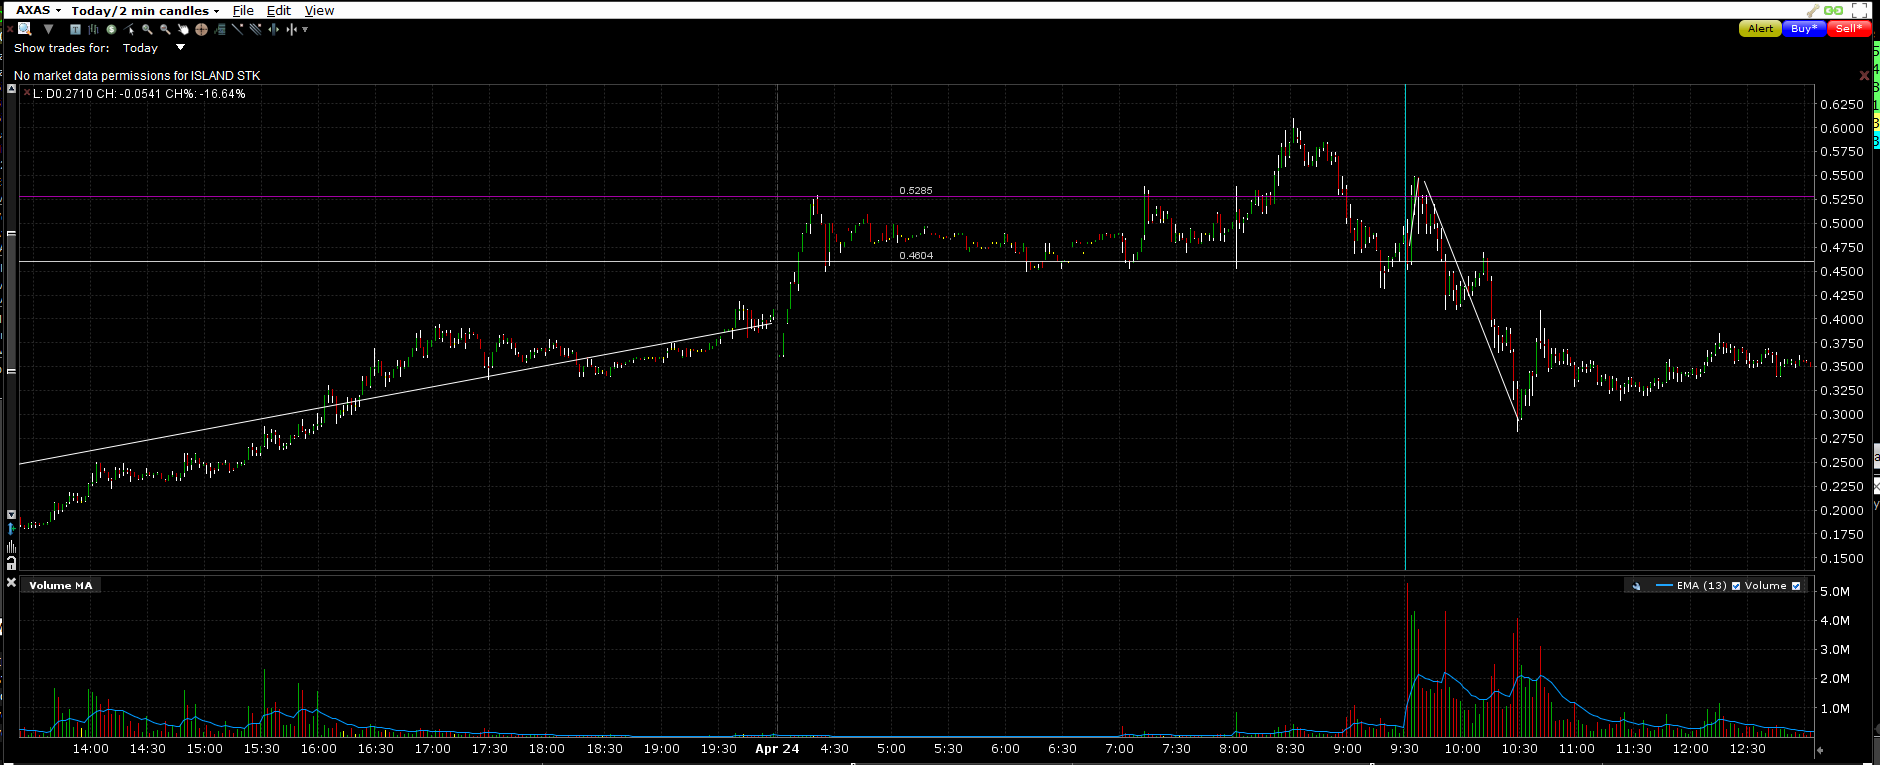

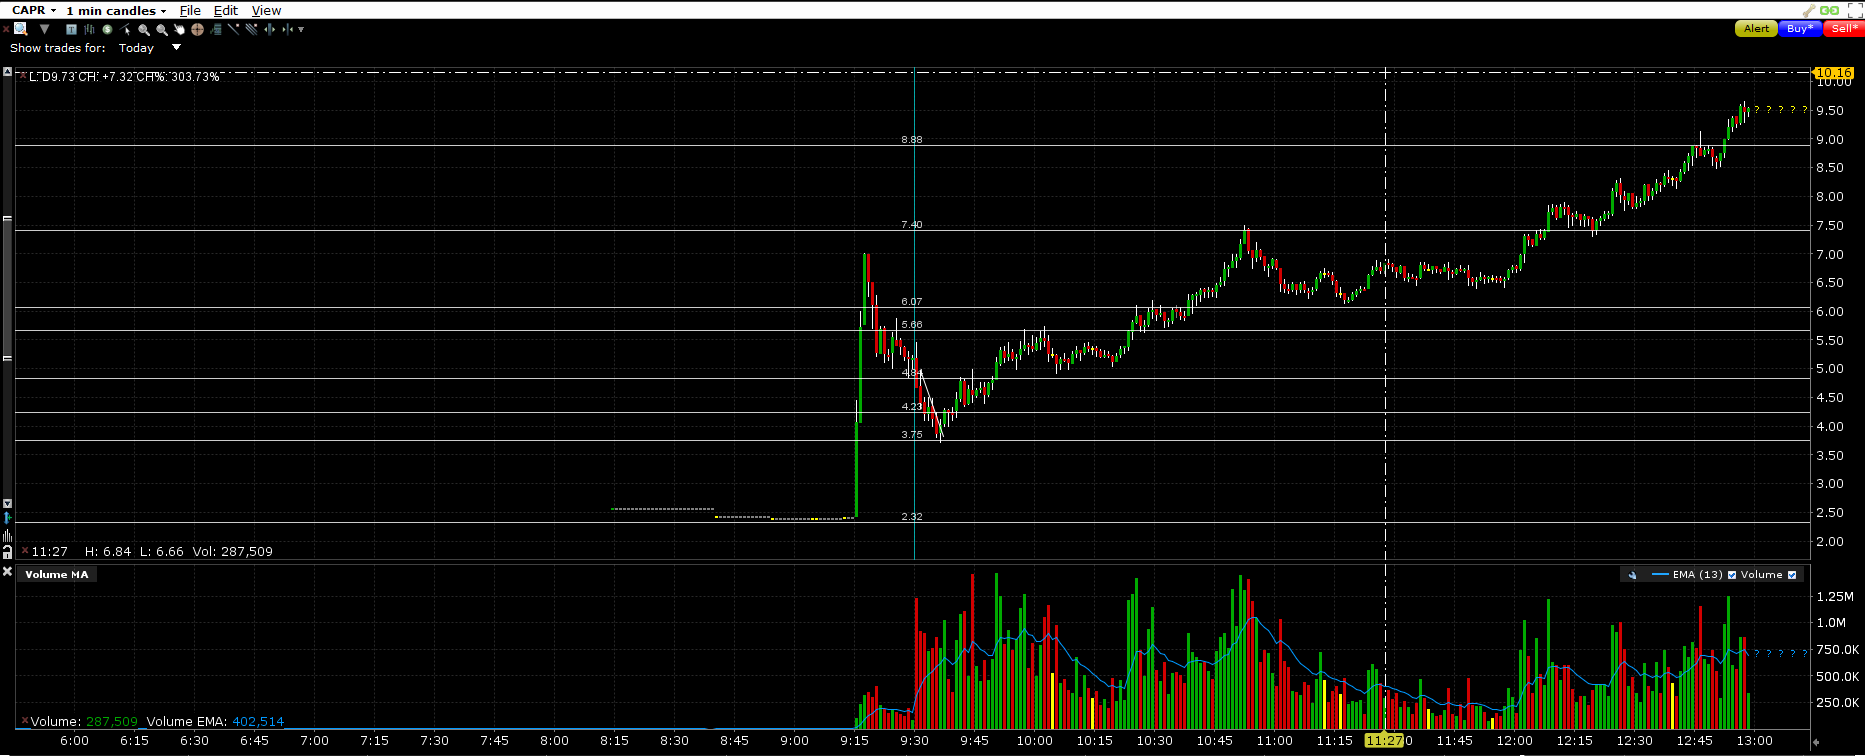

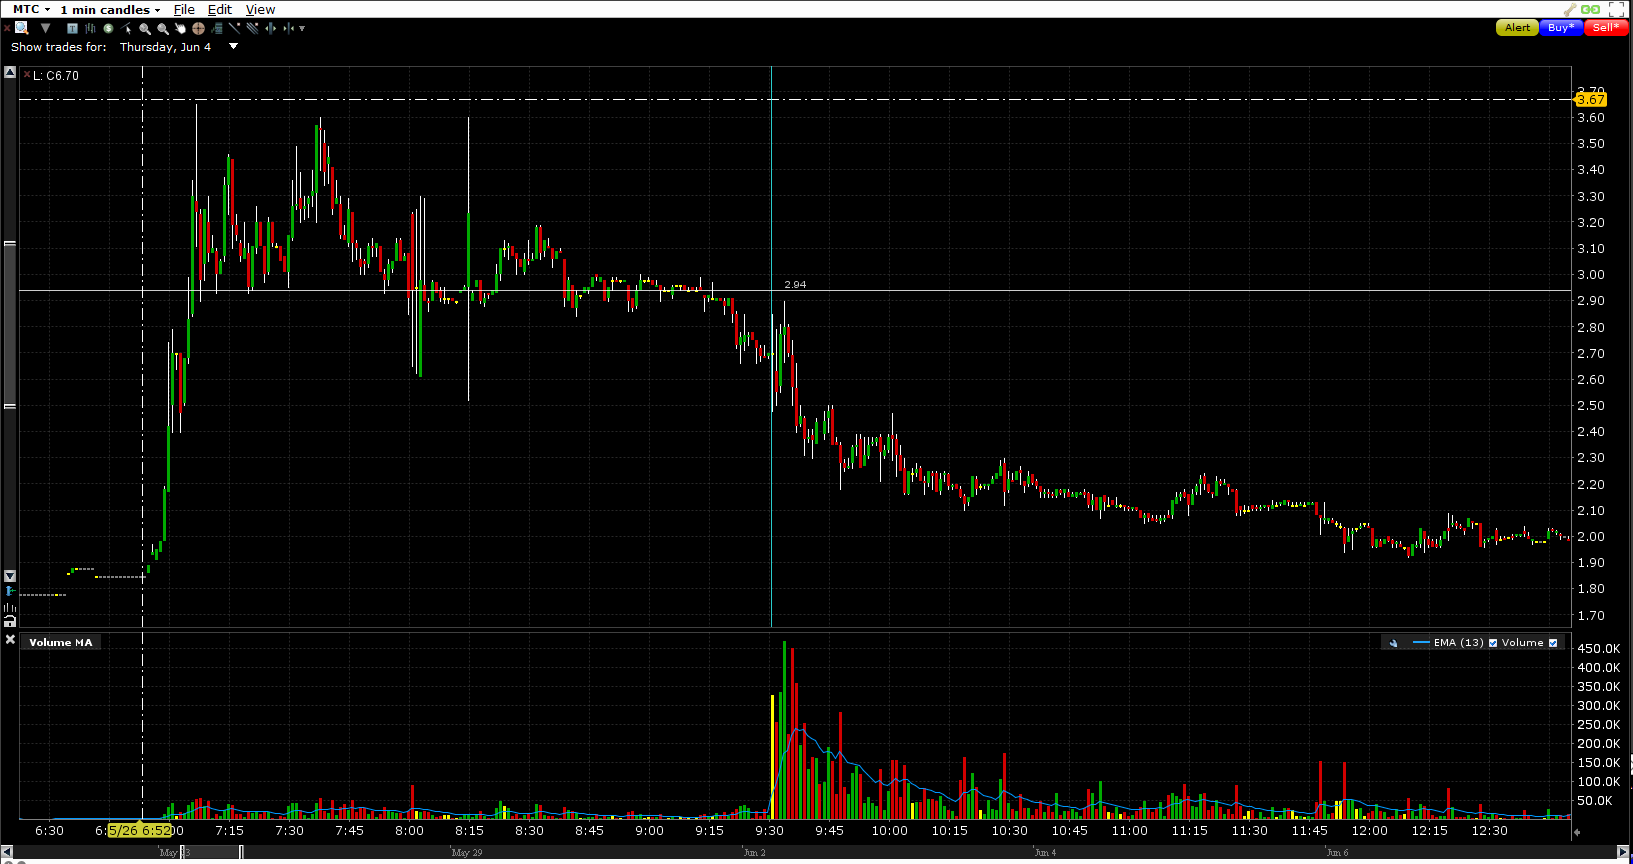

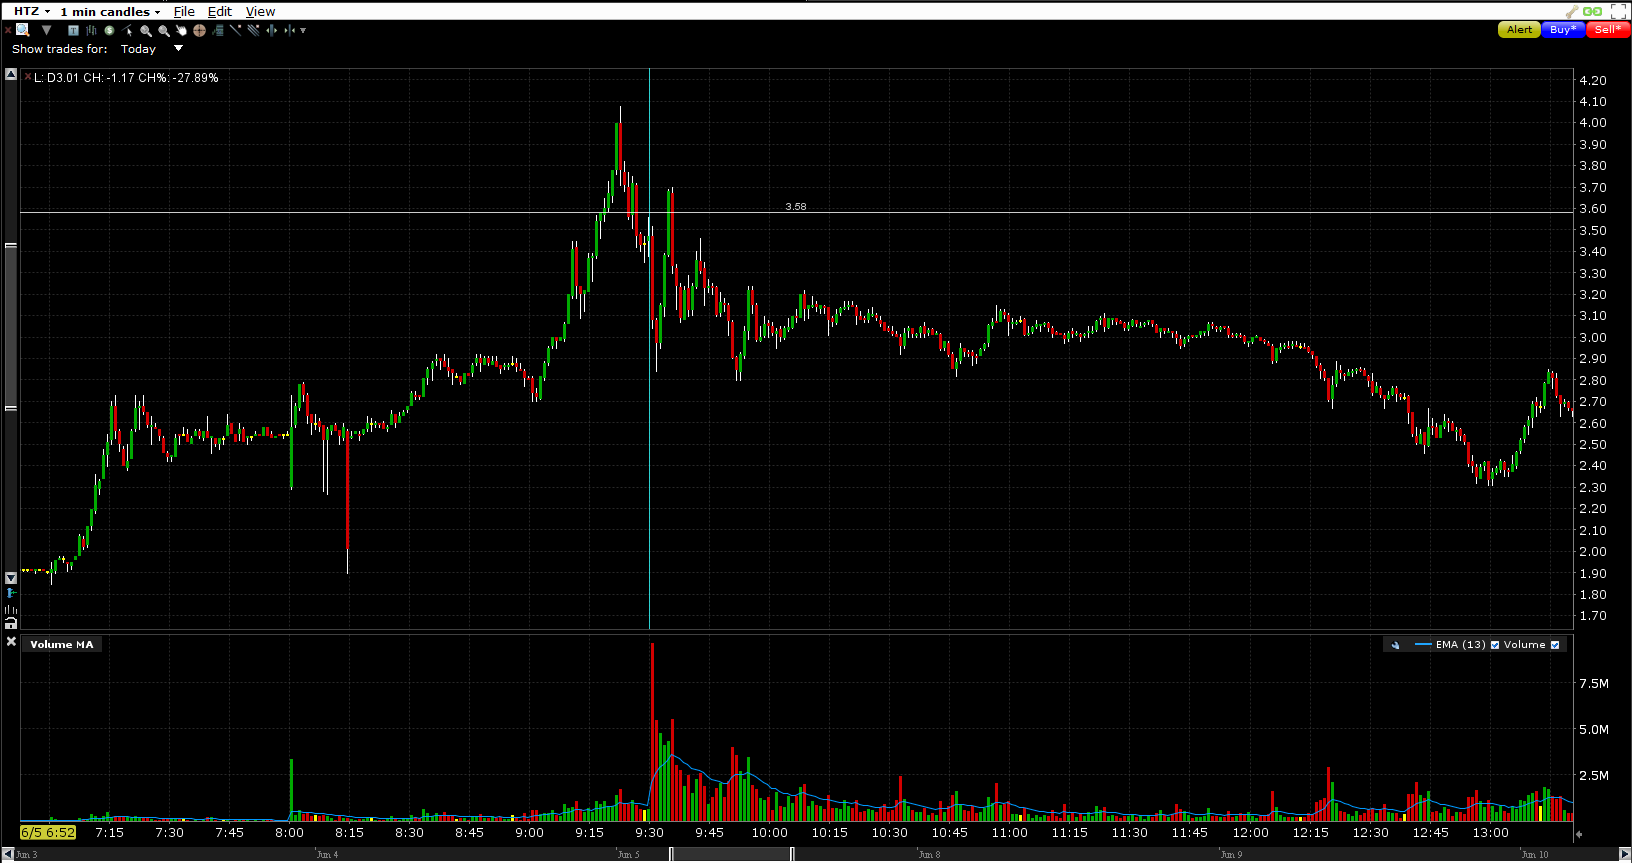

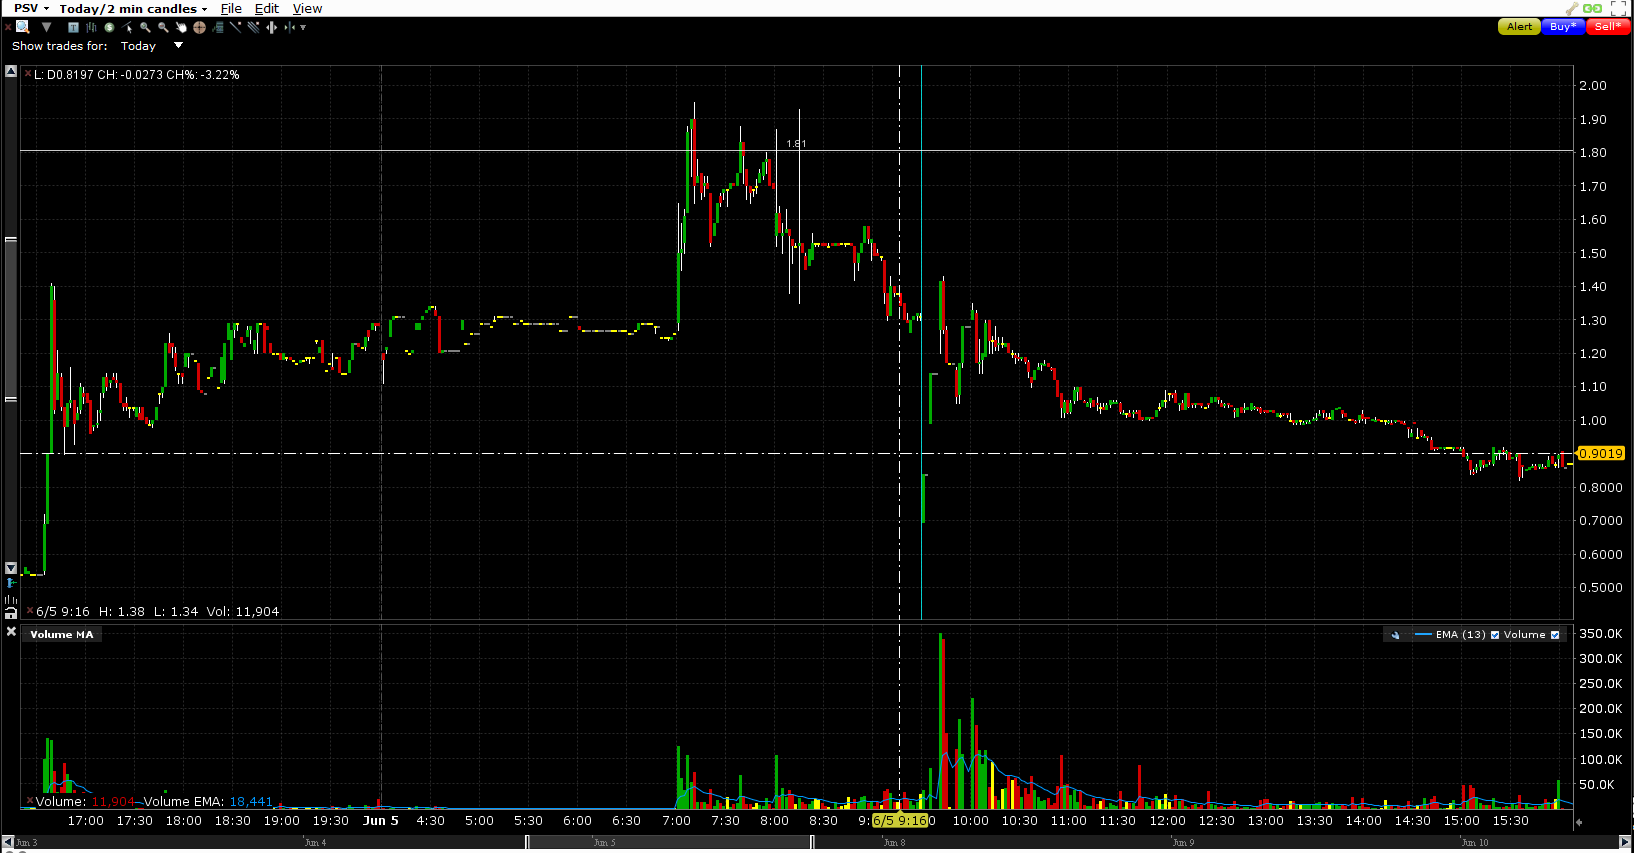

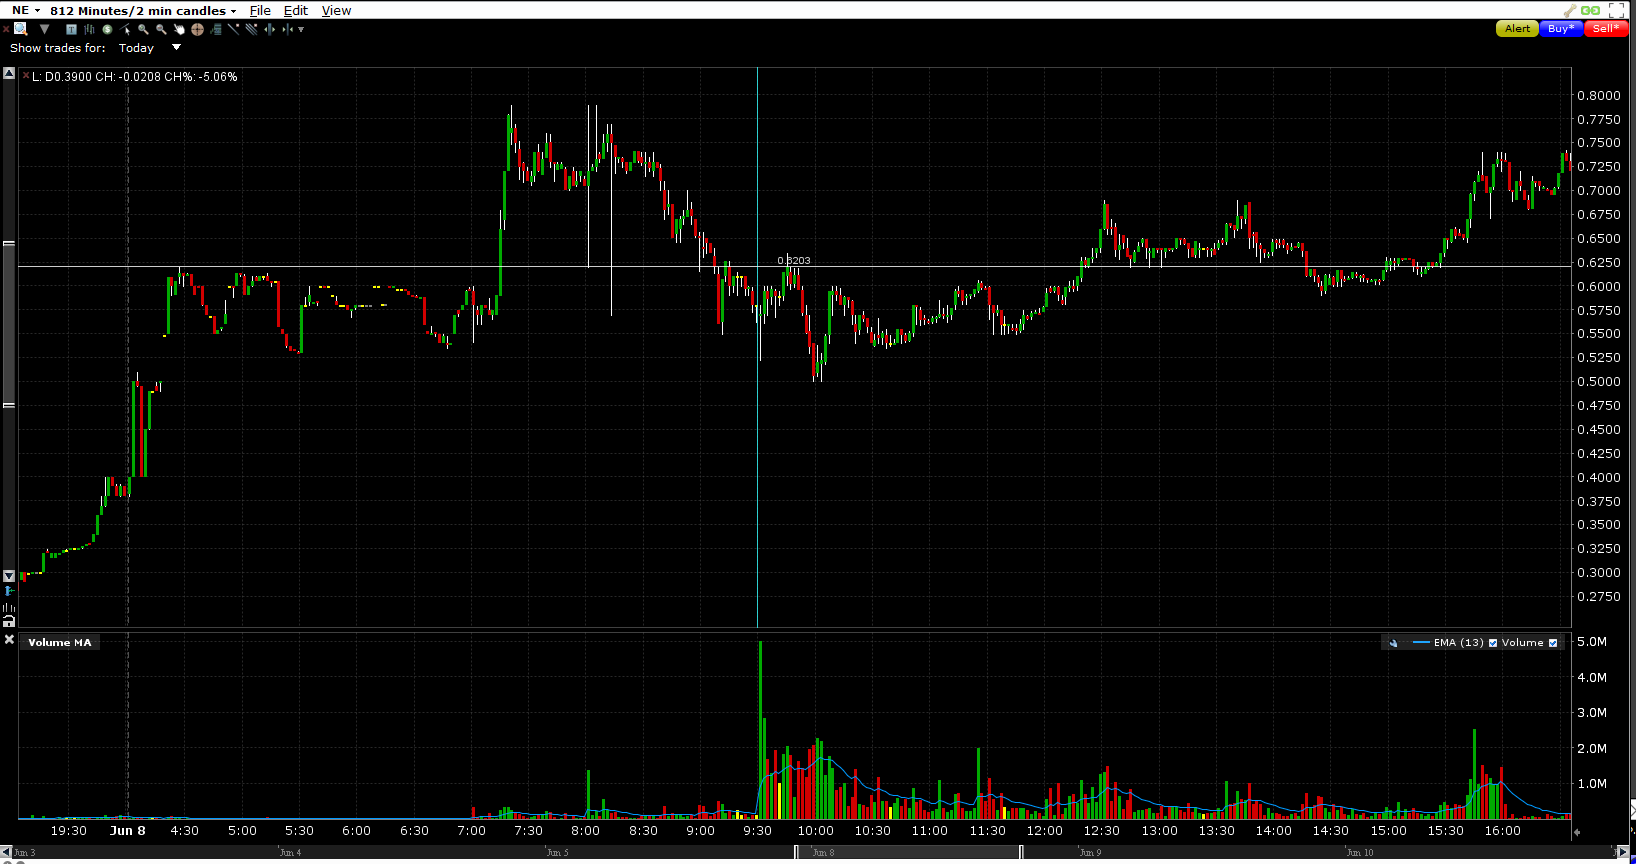

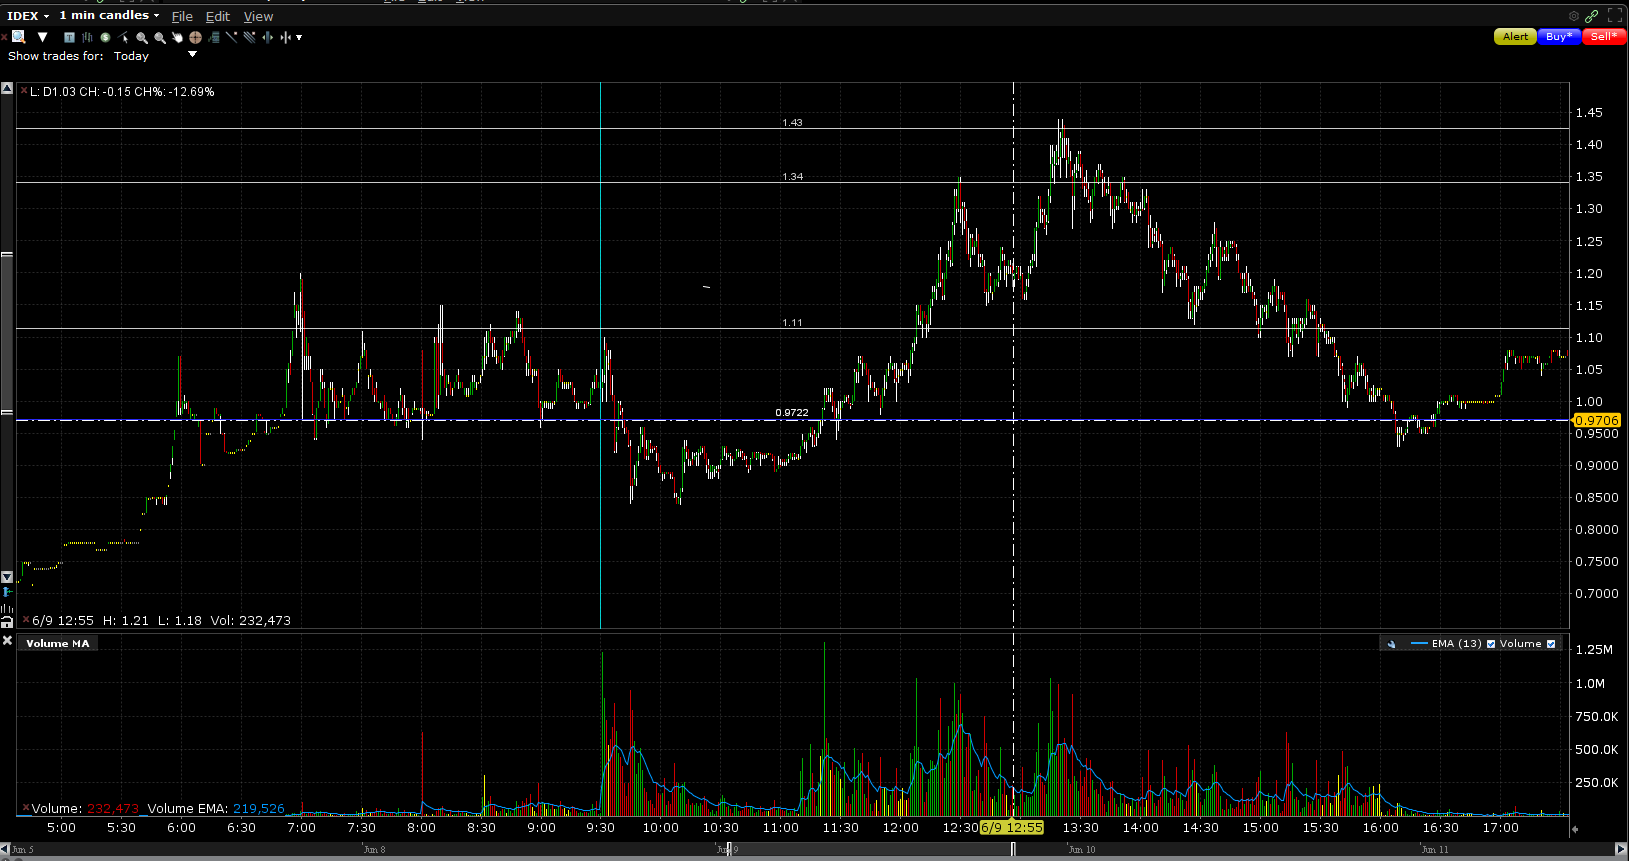

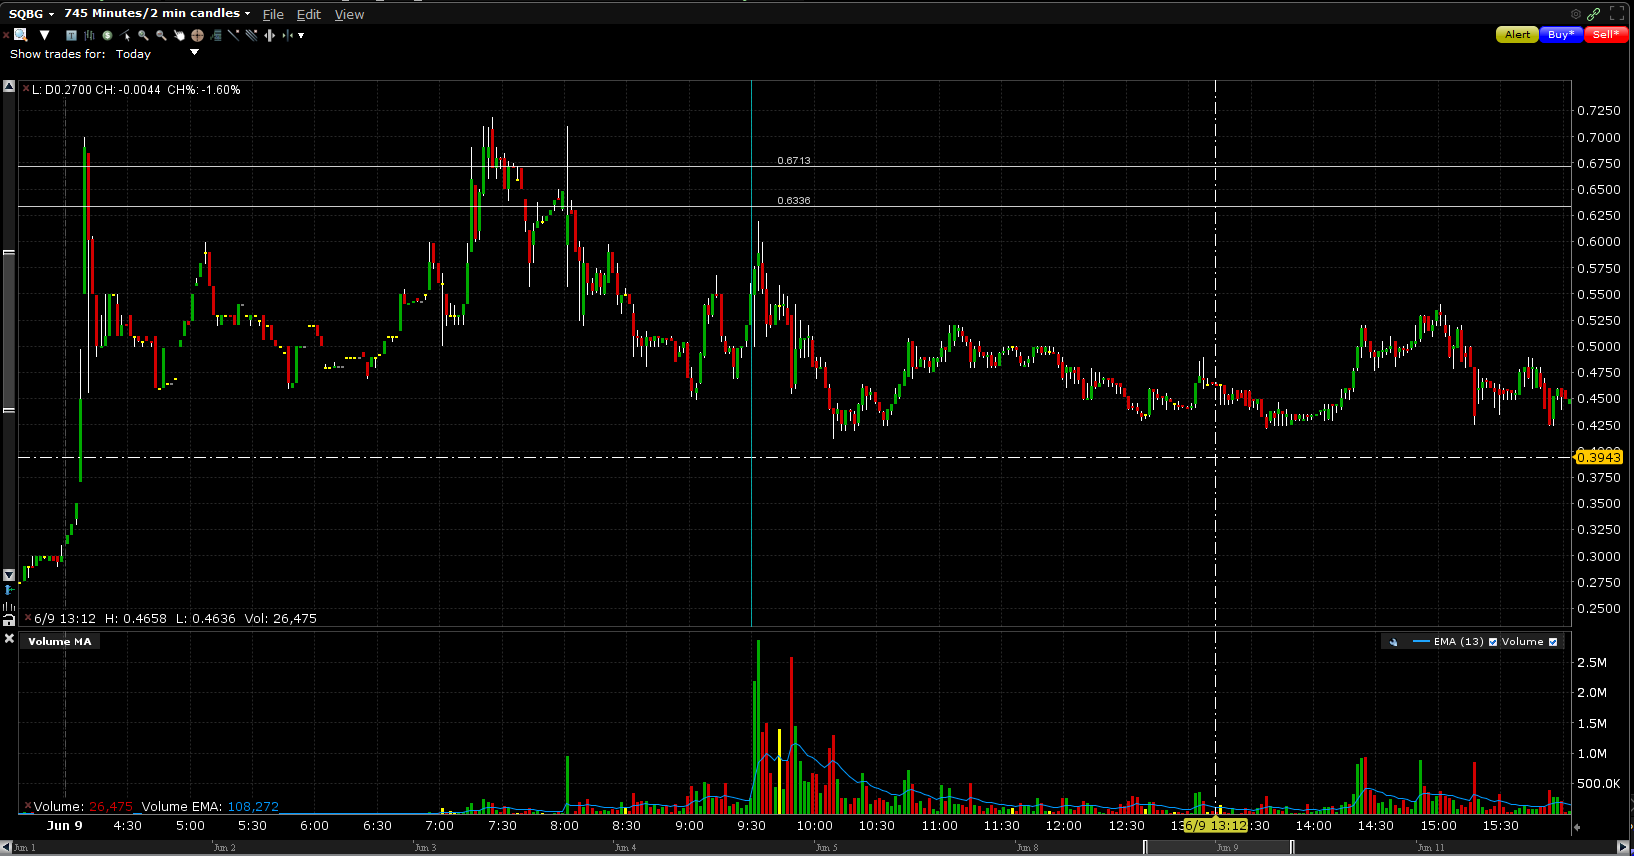

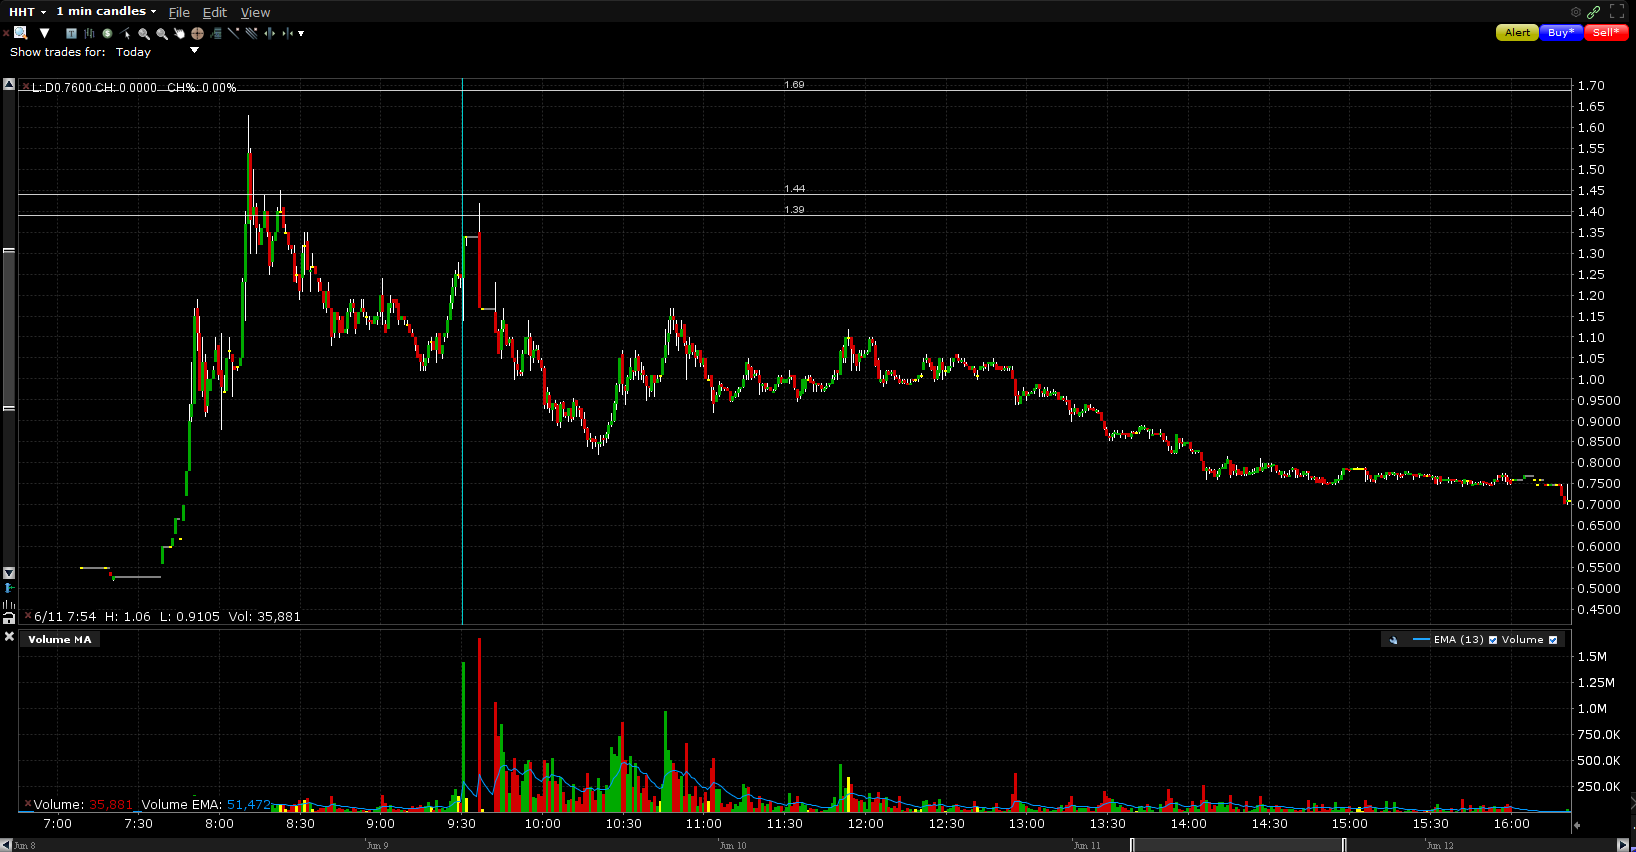

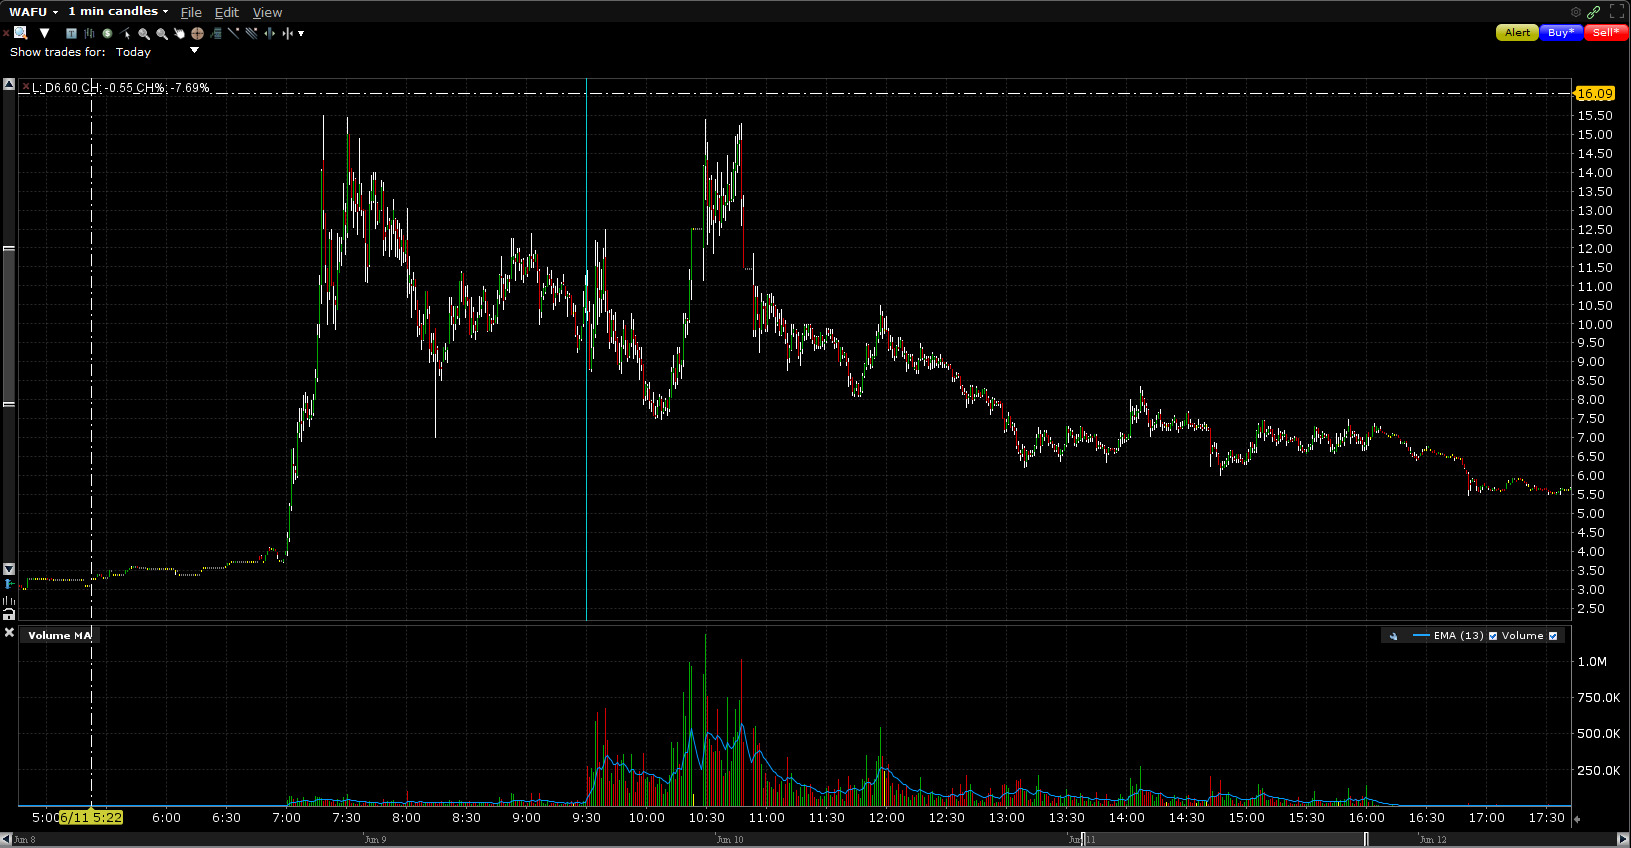

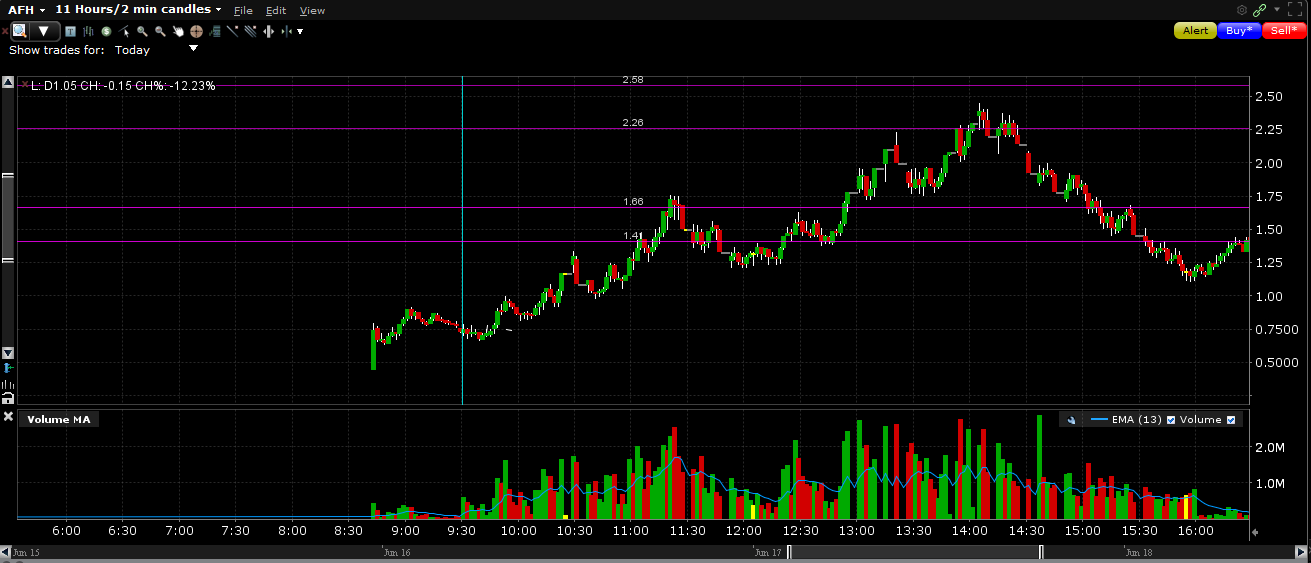

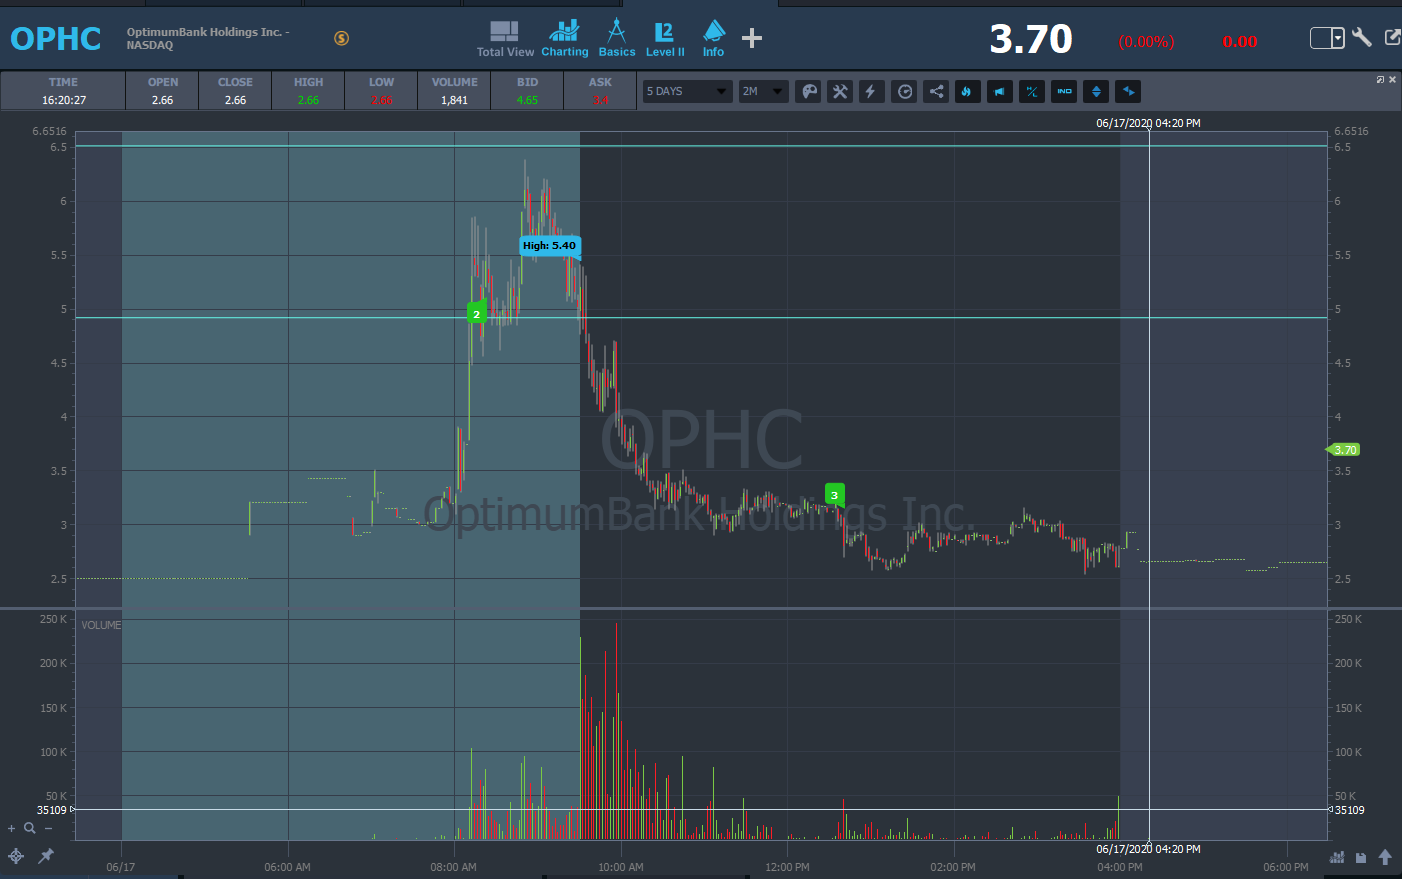

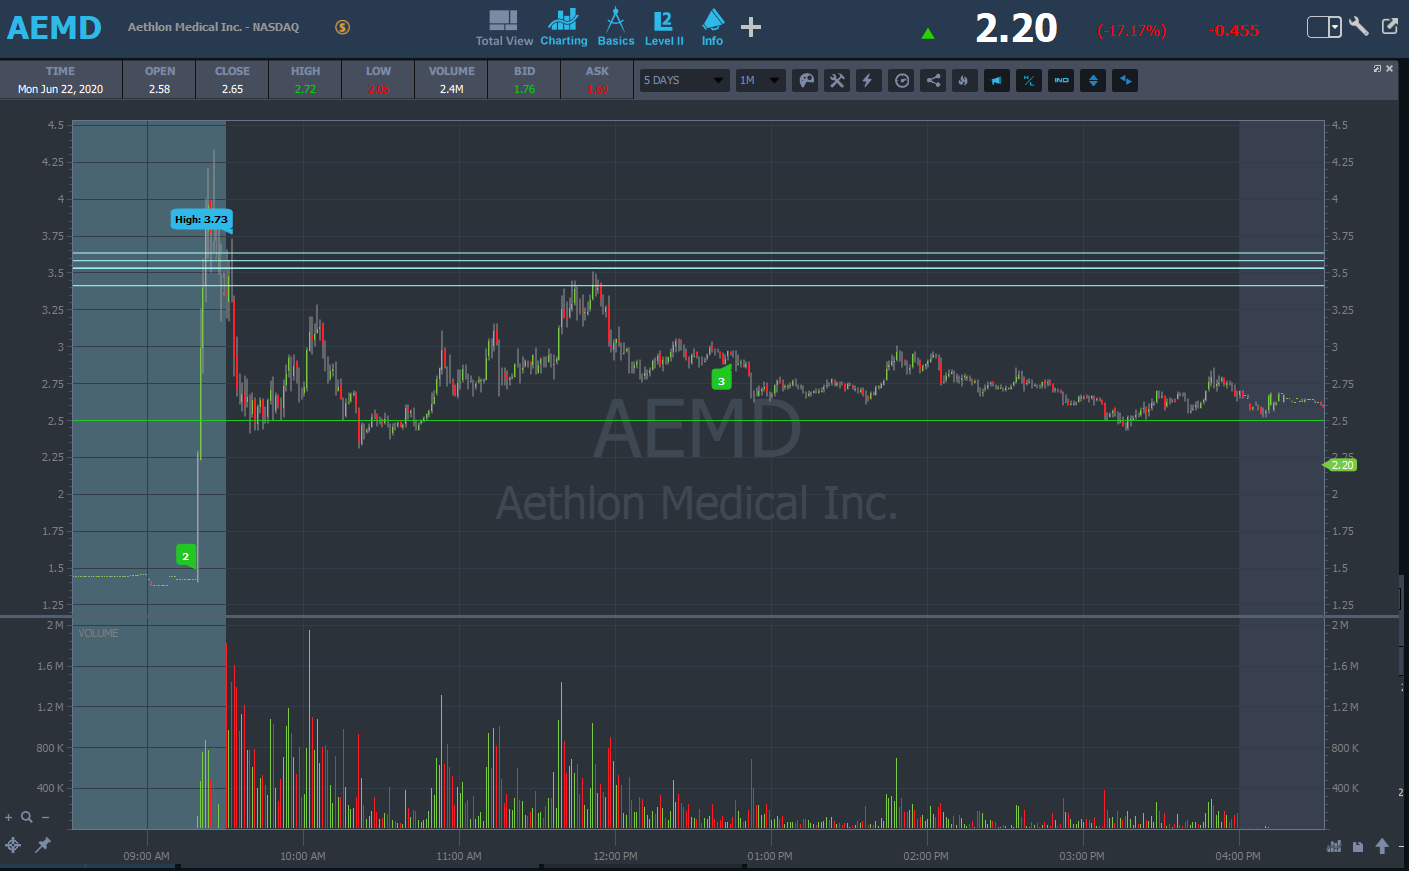

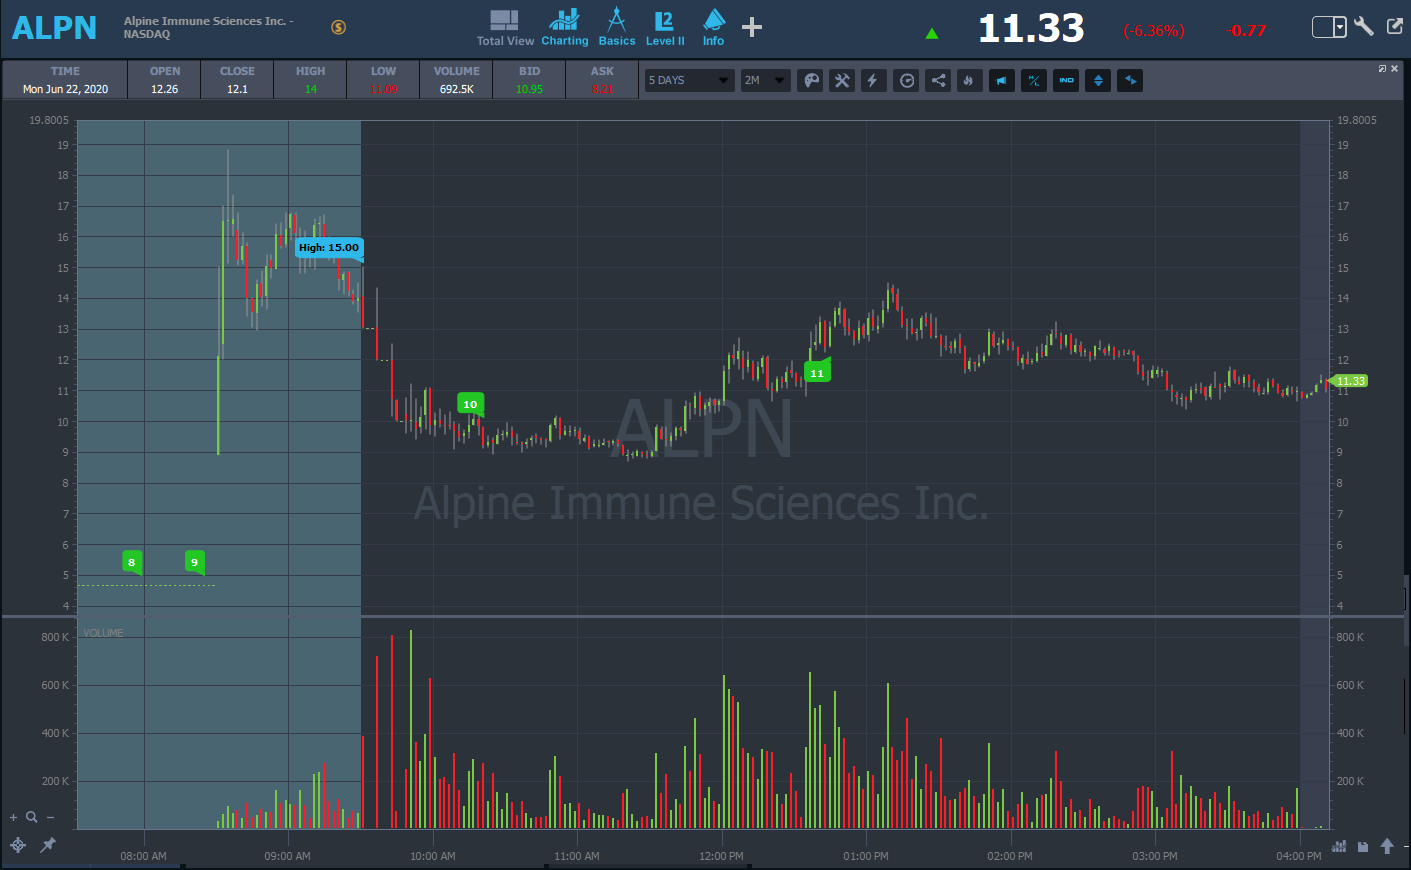

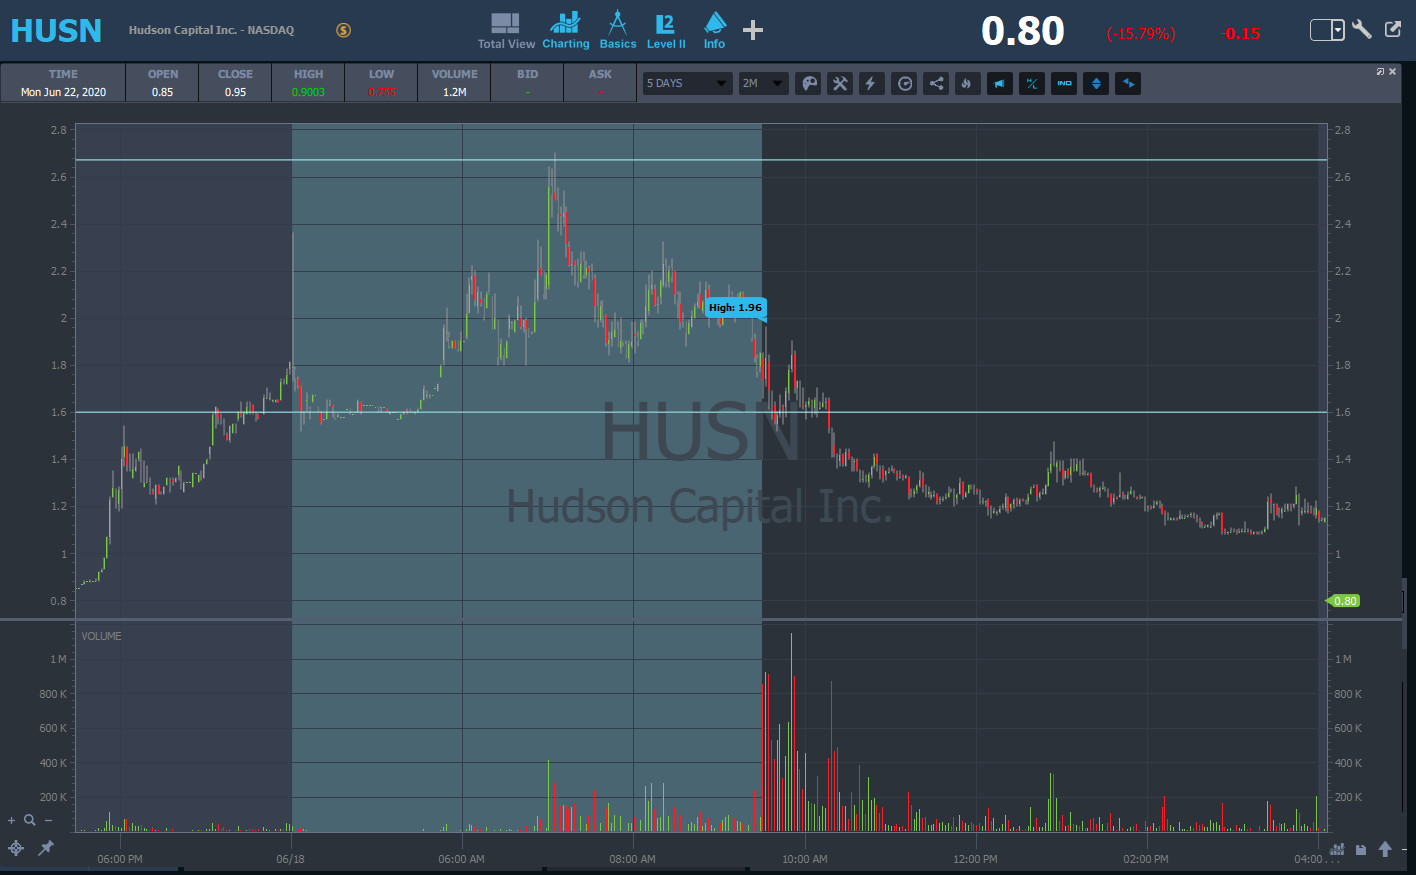

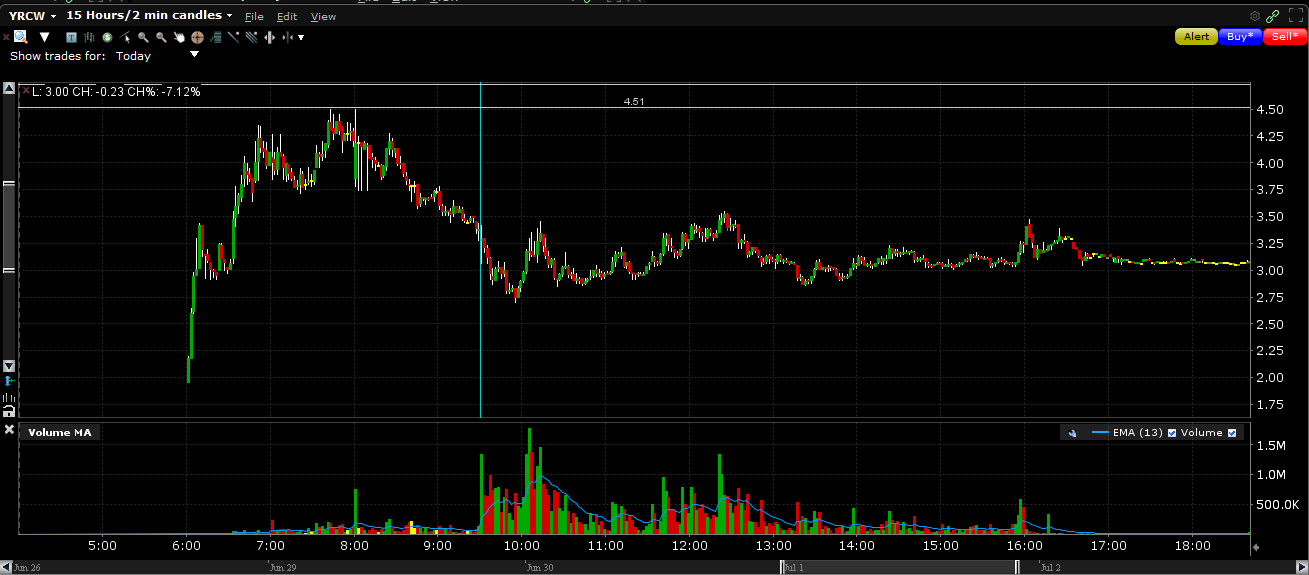

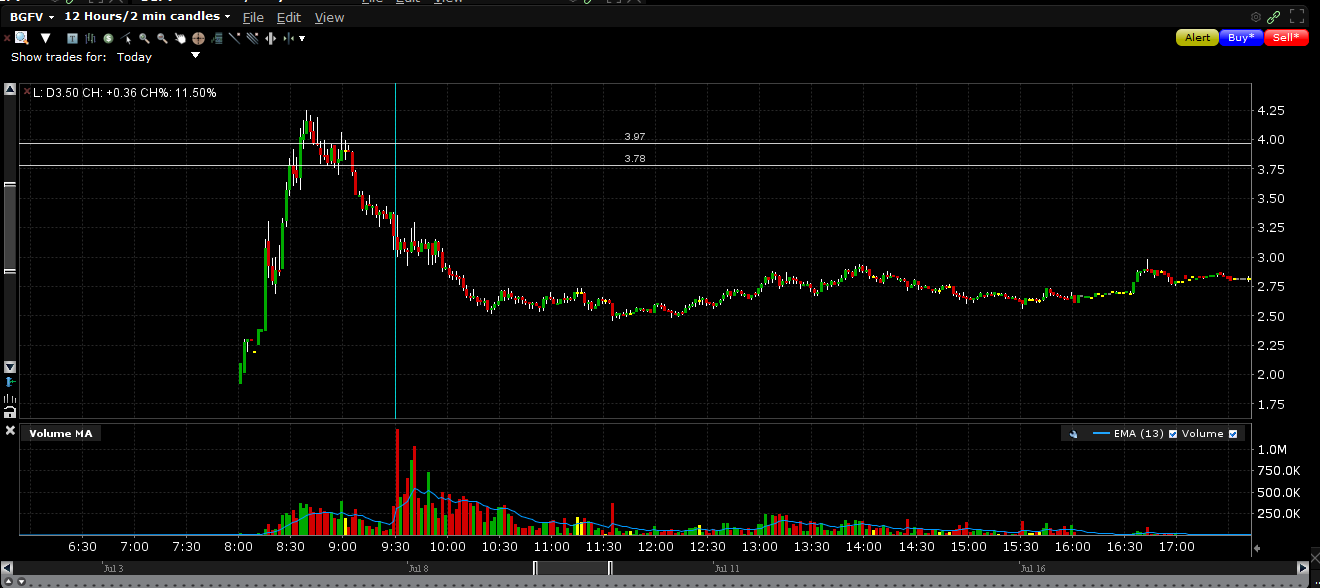

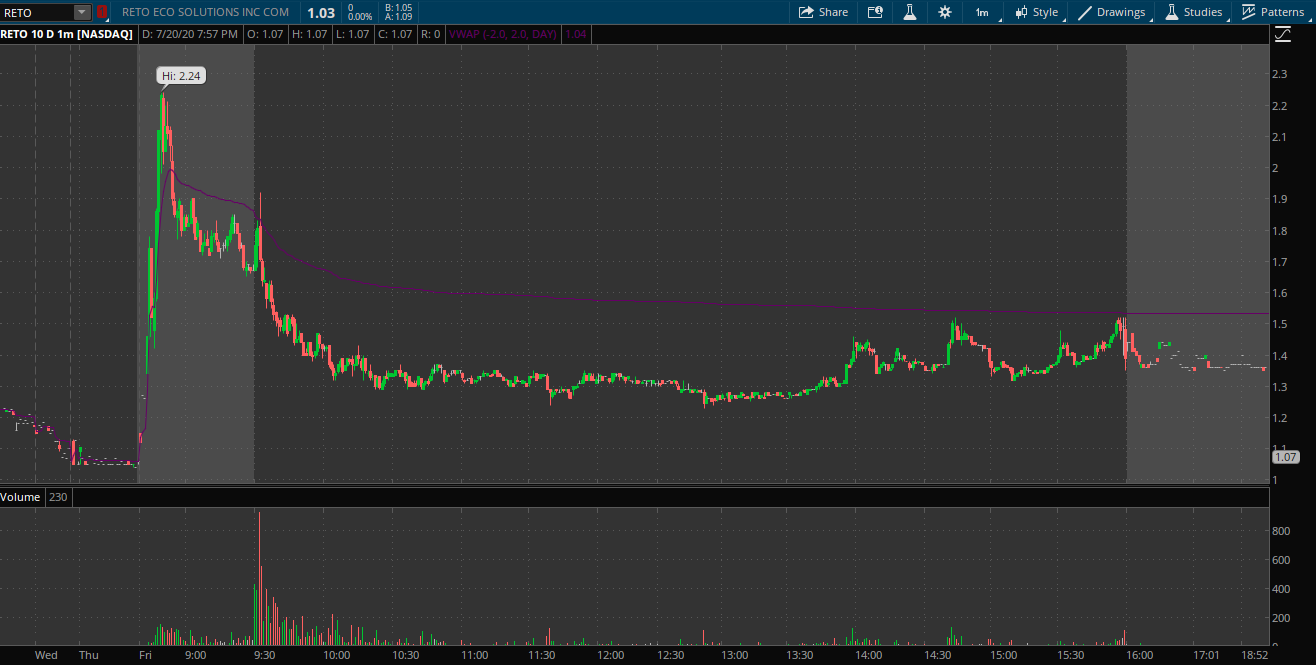

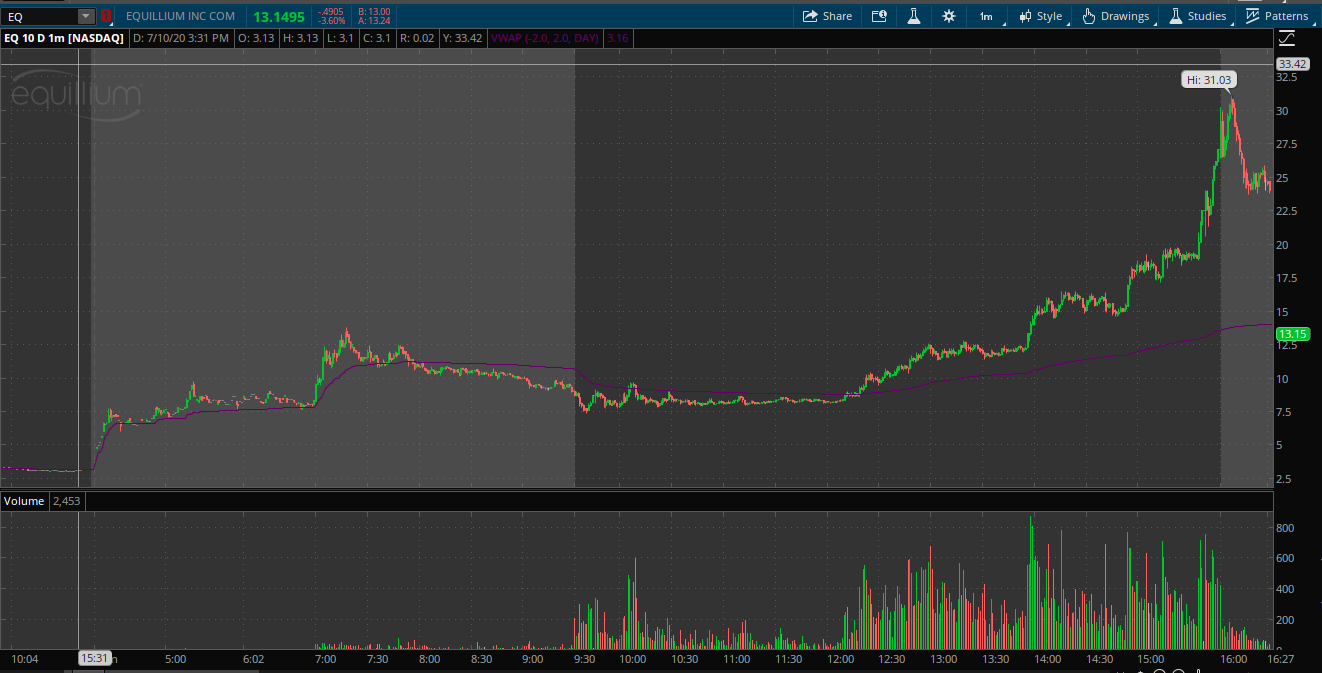

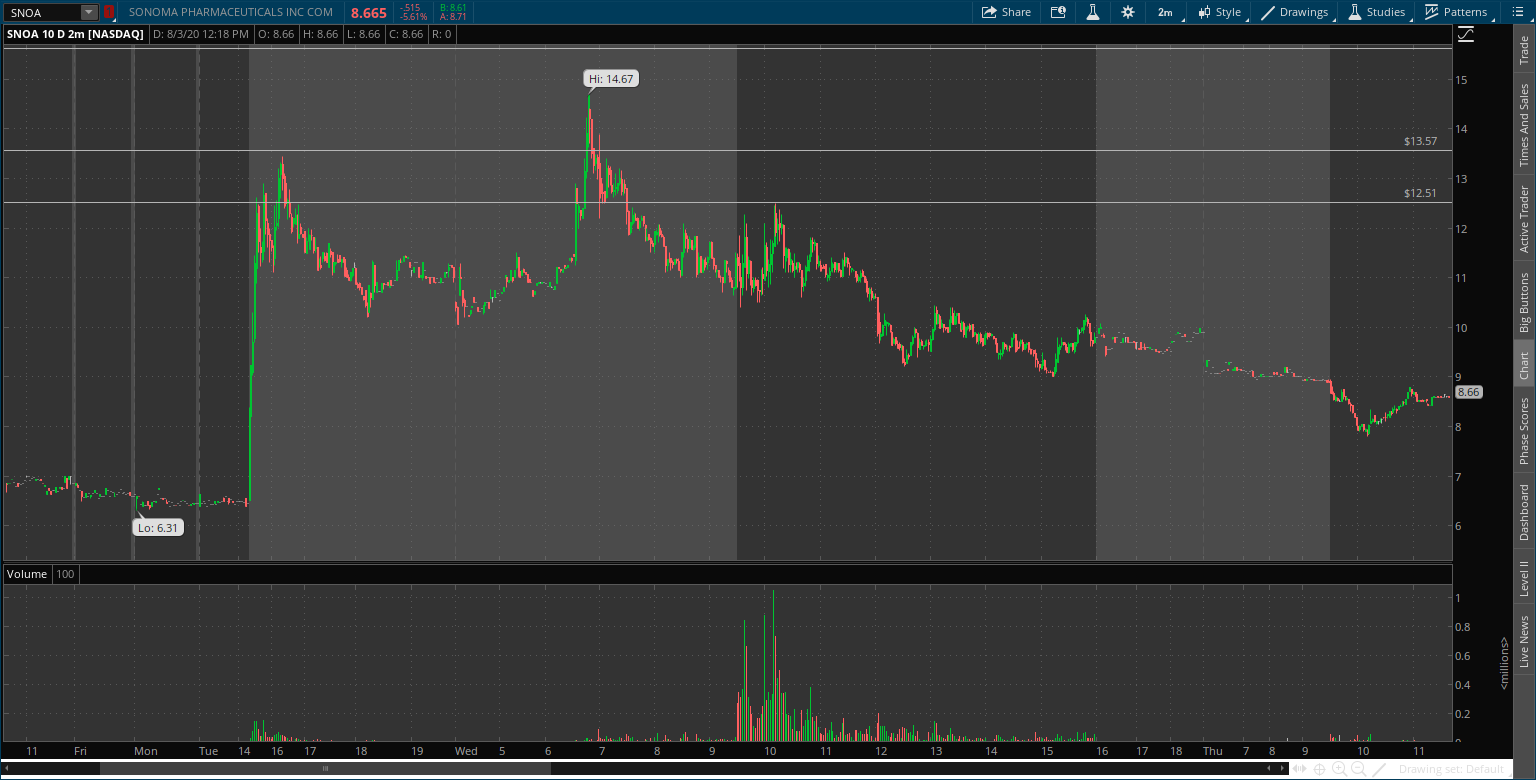

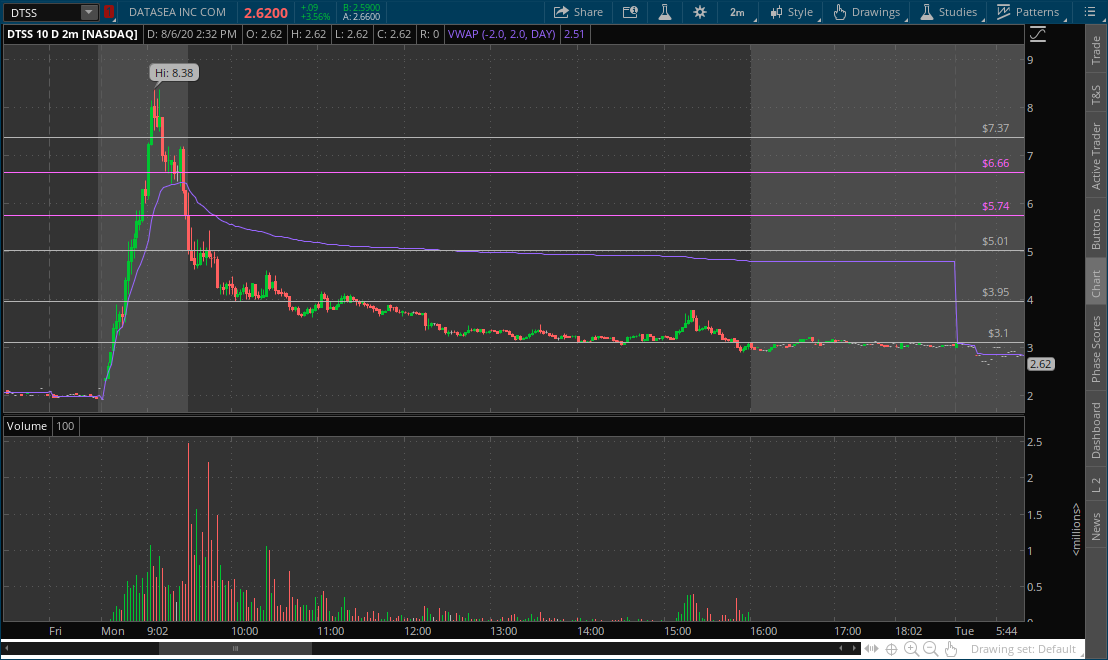

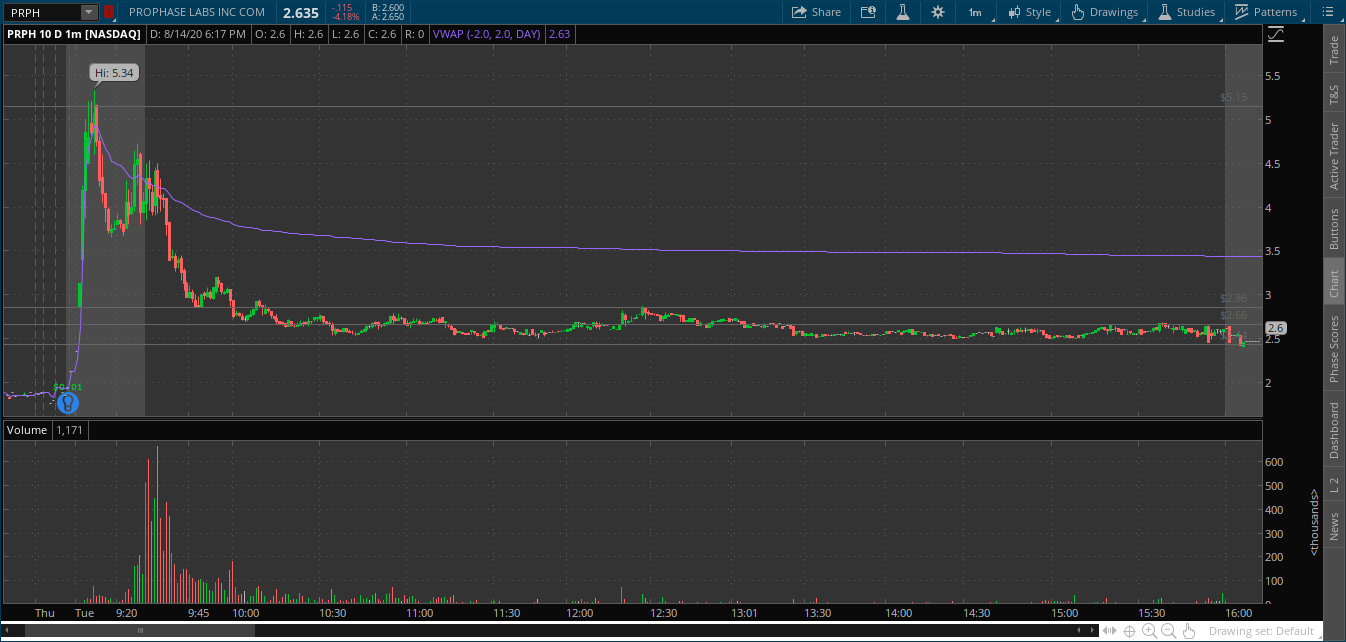

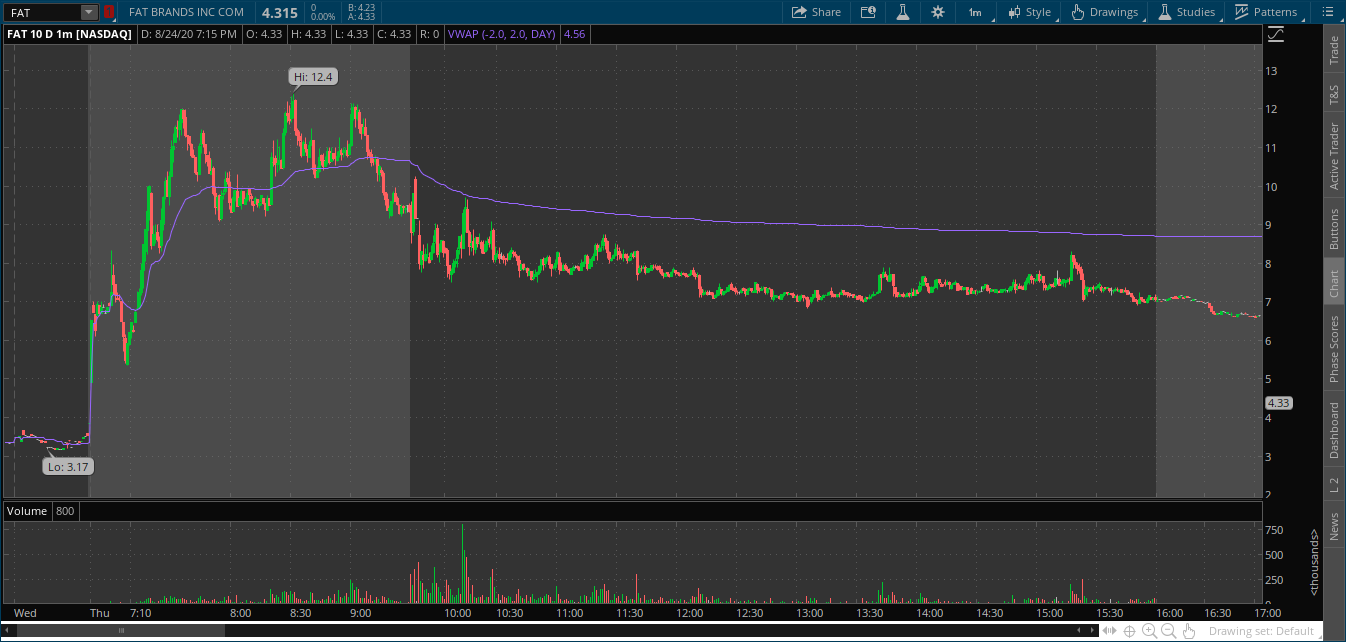

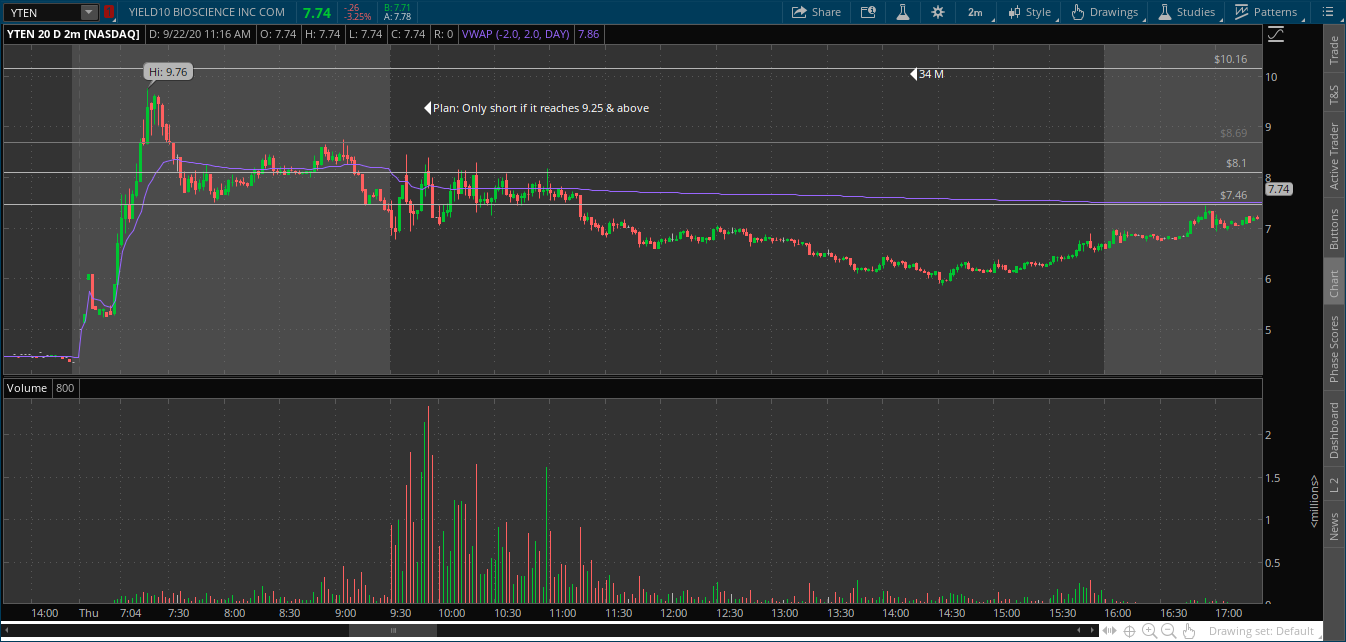

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

<IPython.core.display.Image object>

Losses:


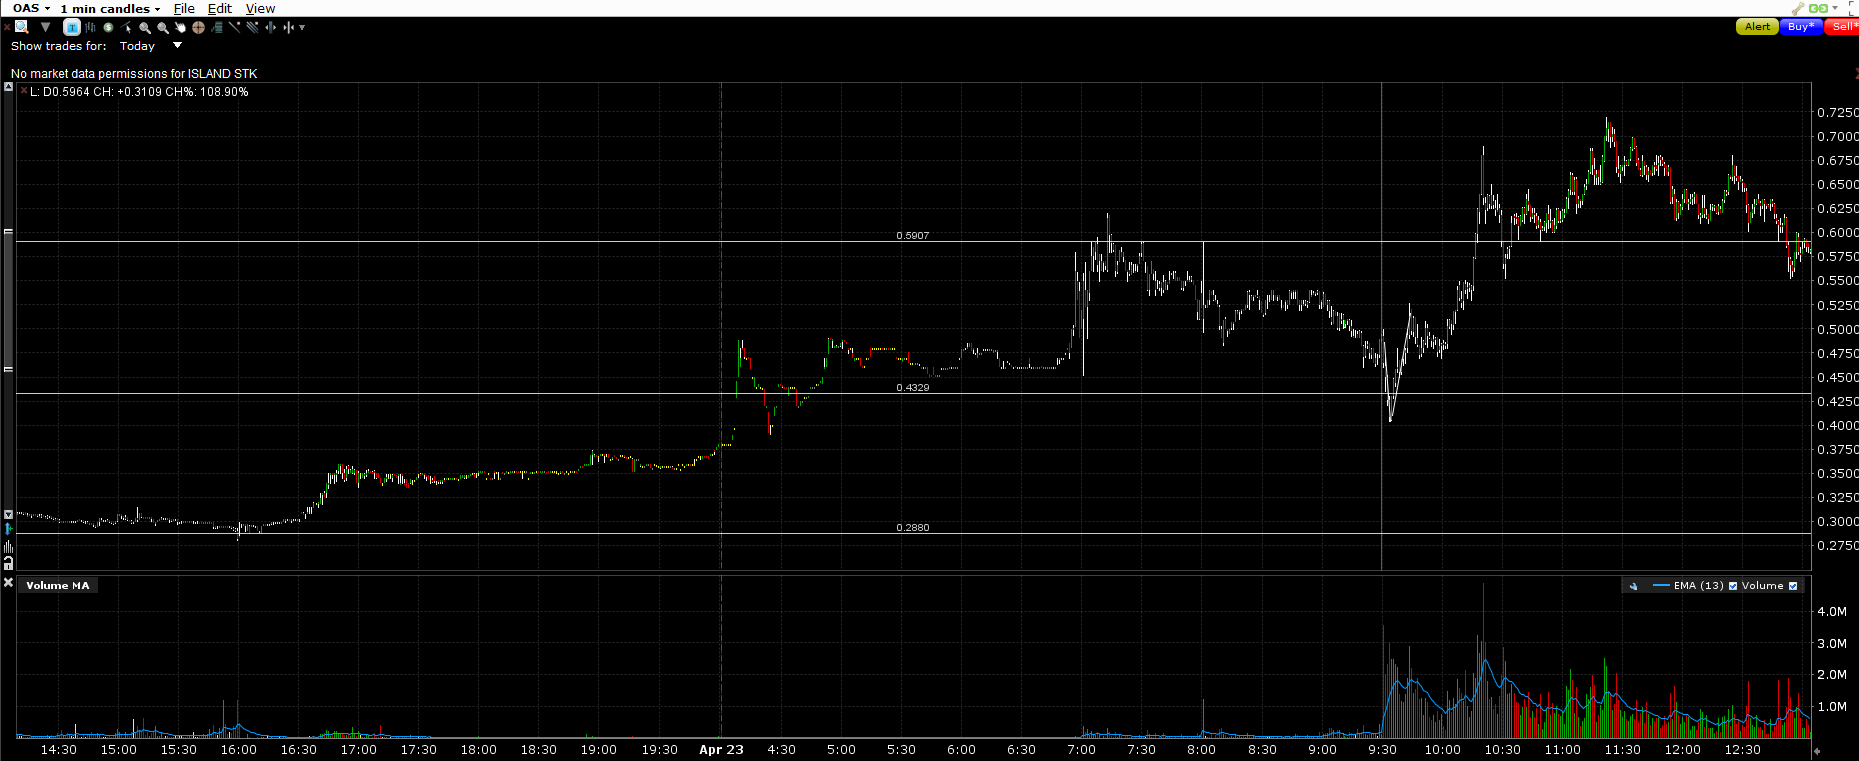

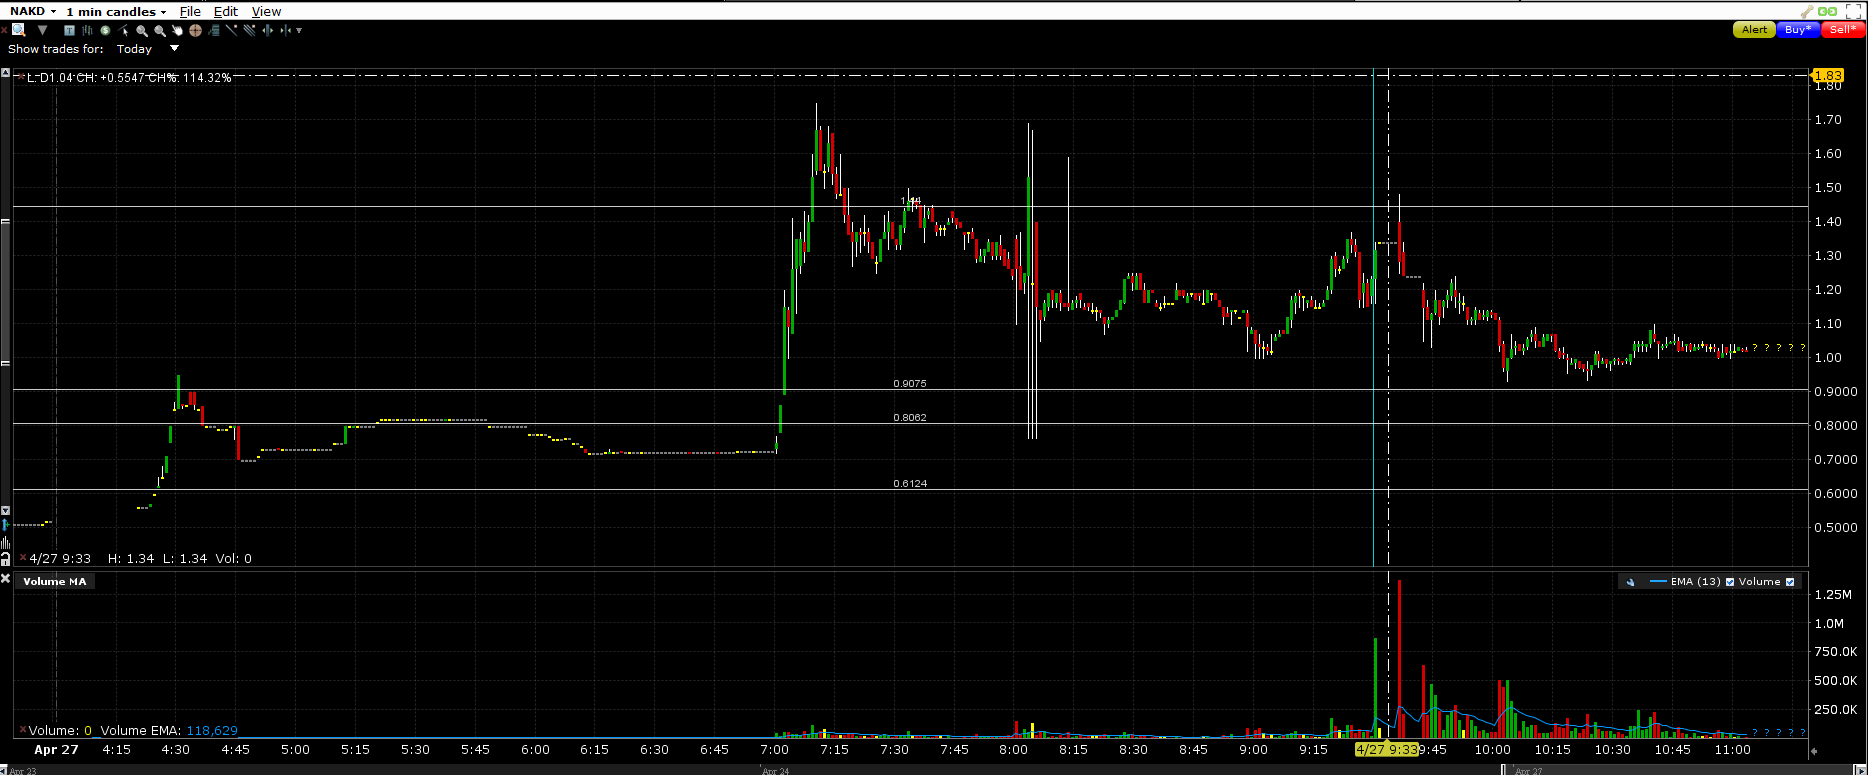

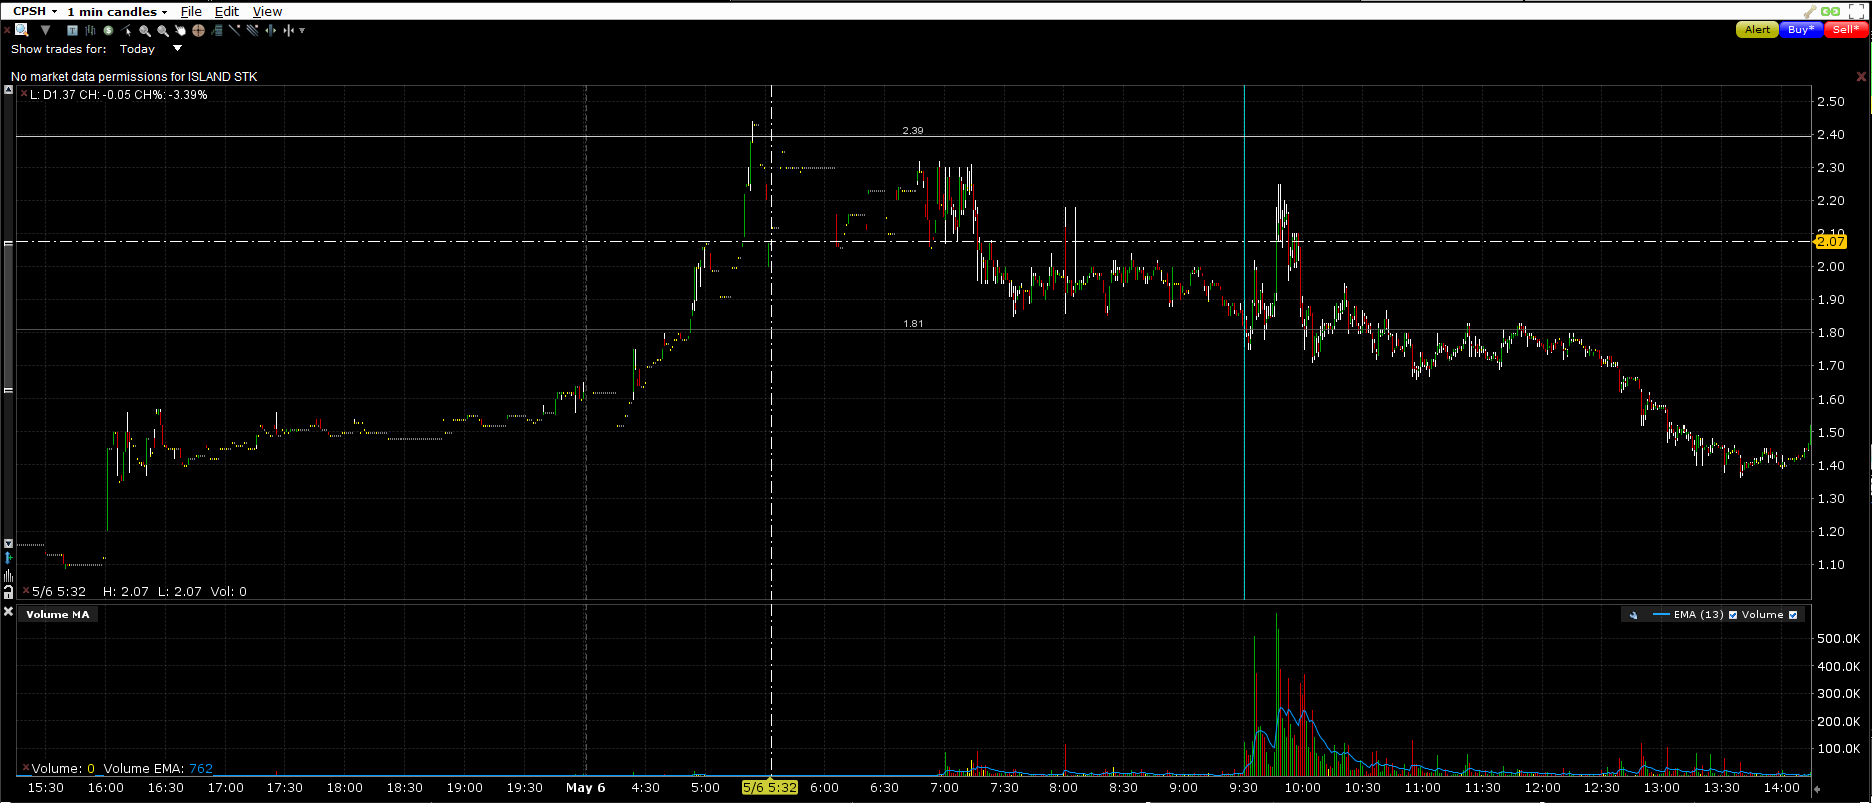

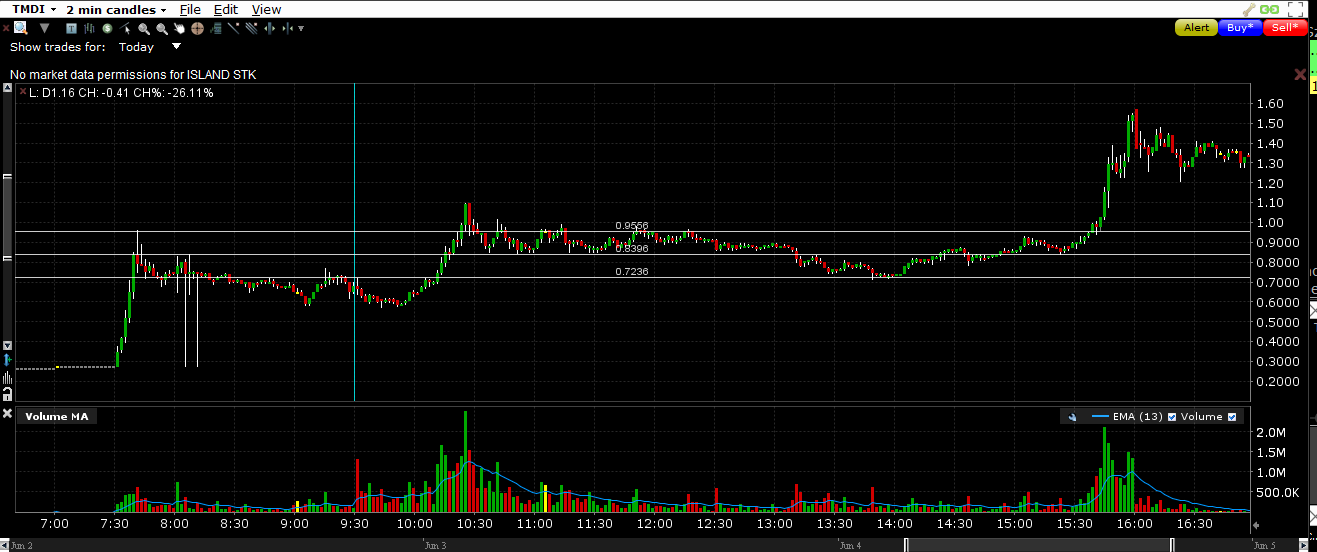

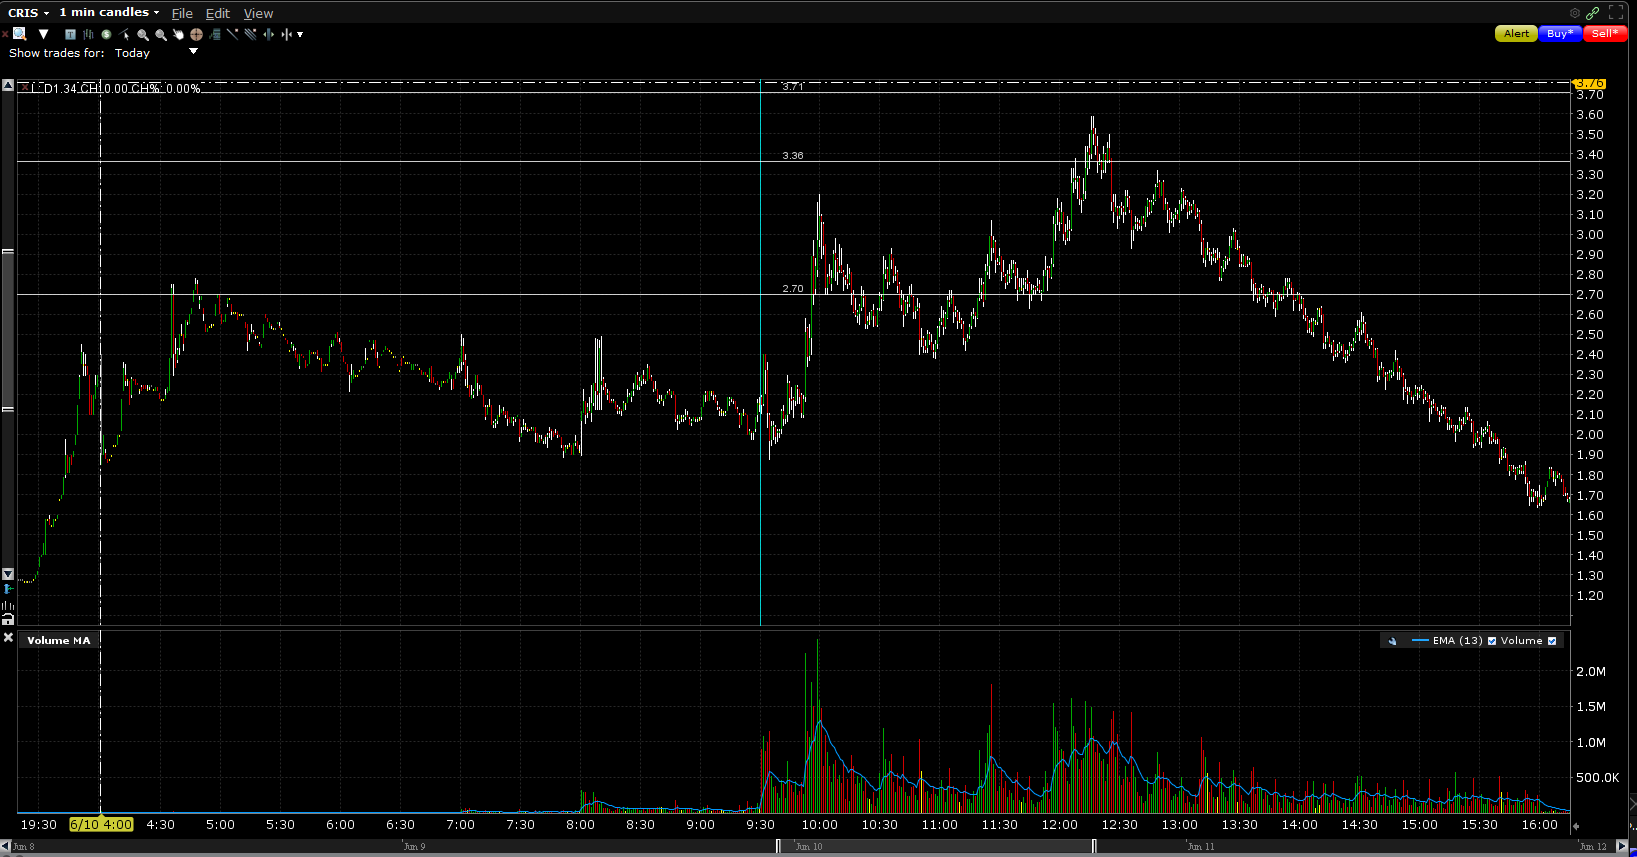

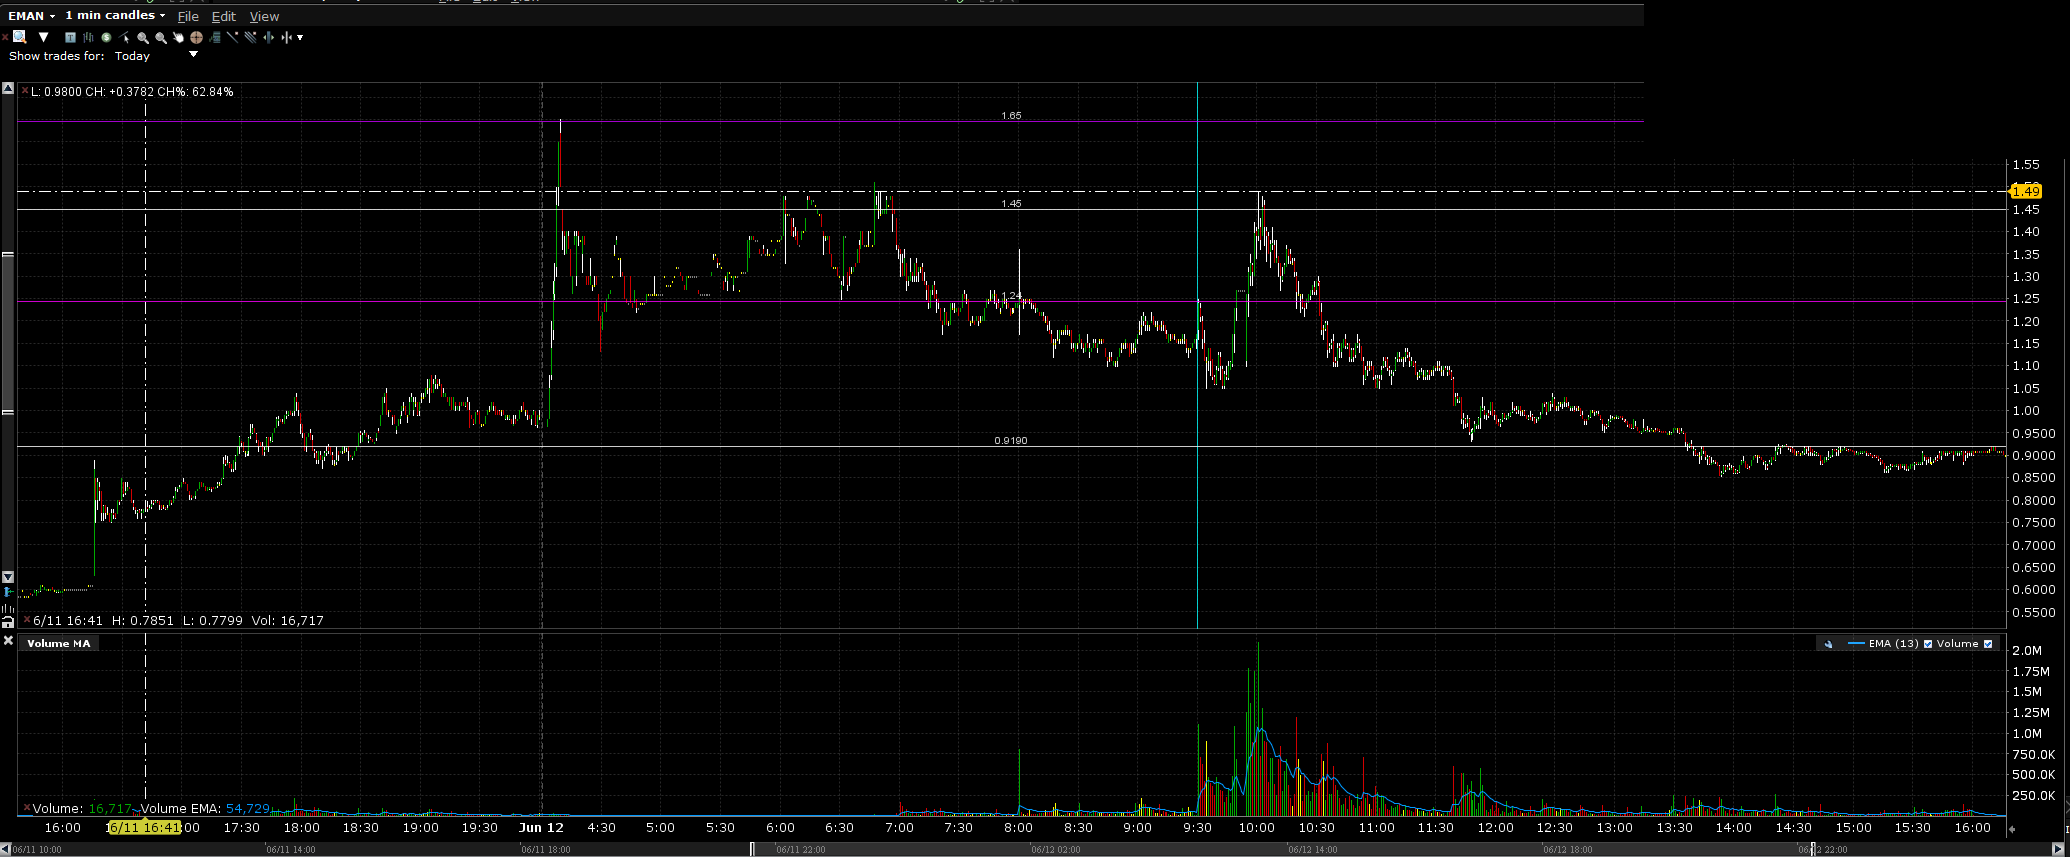

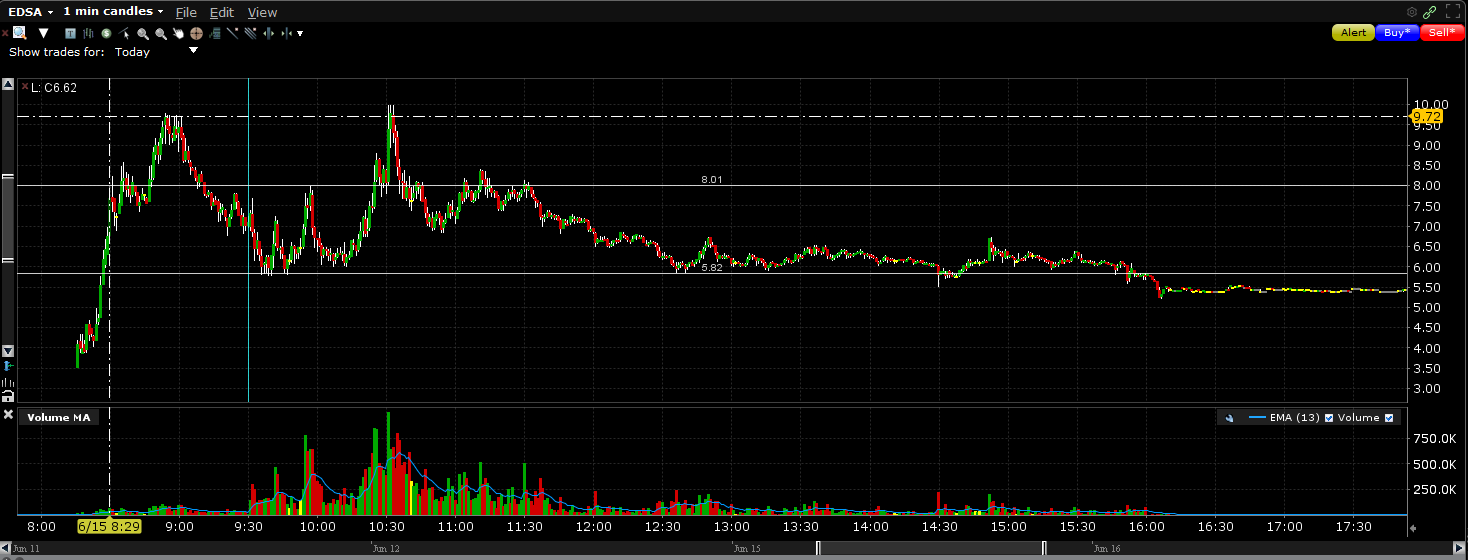

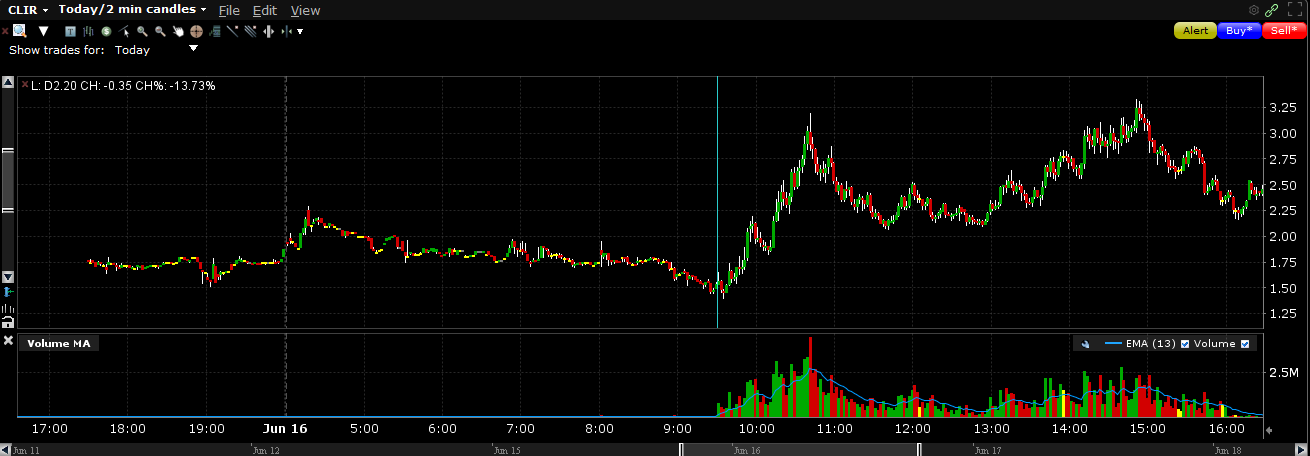

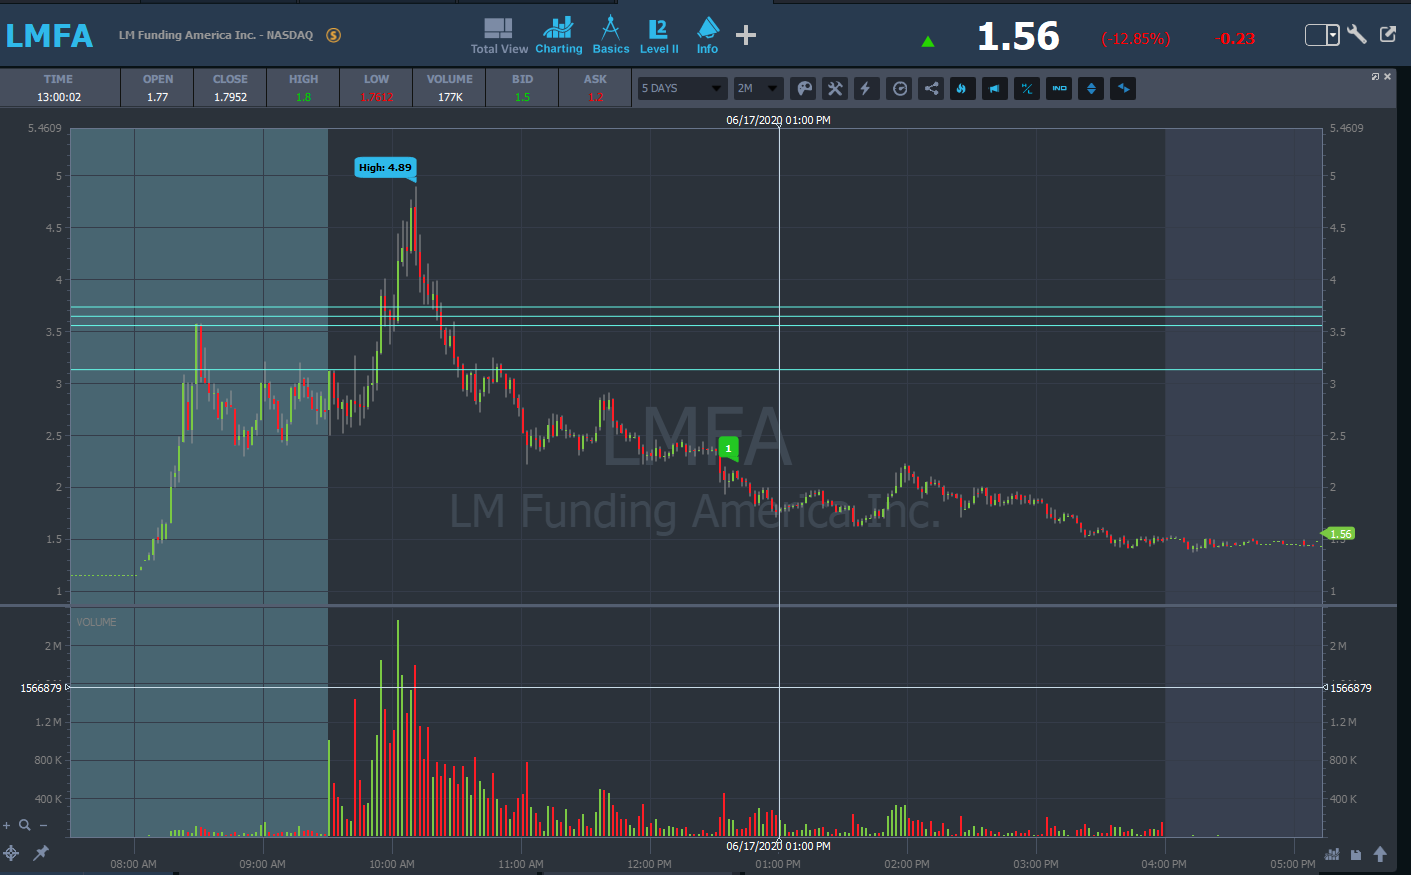

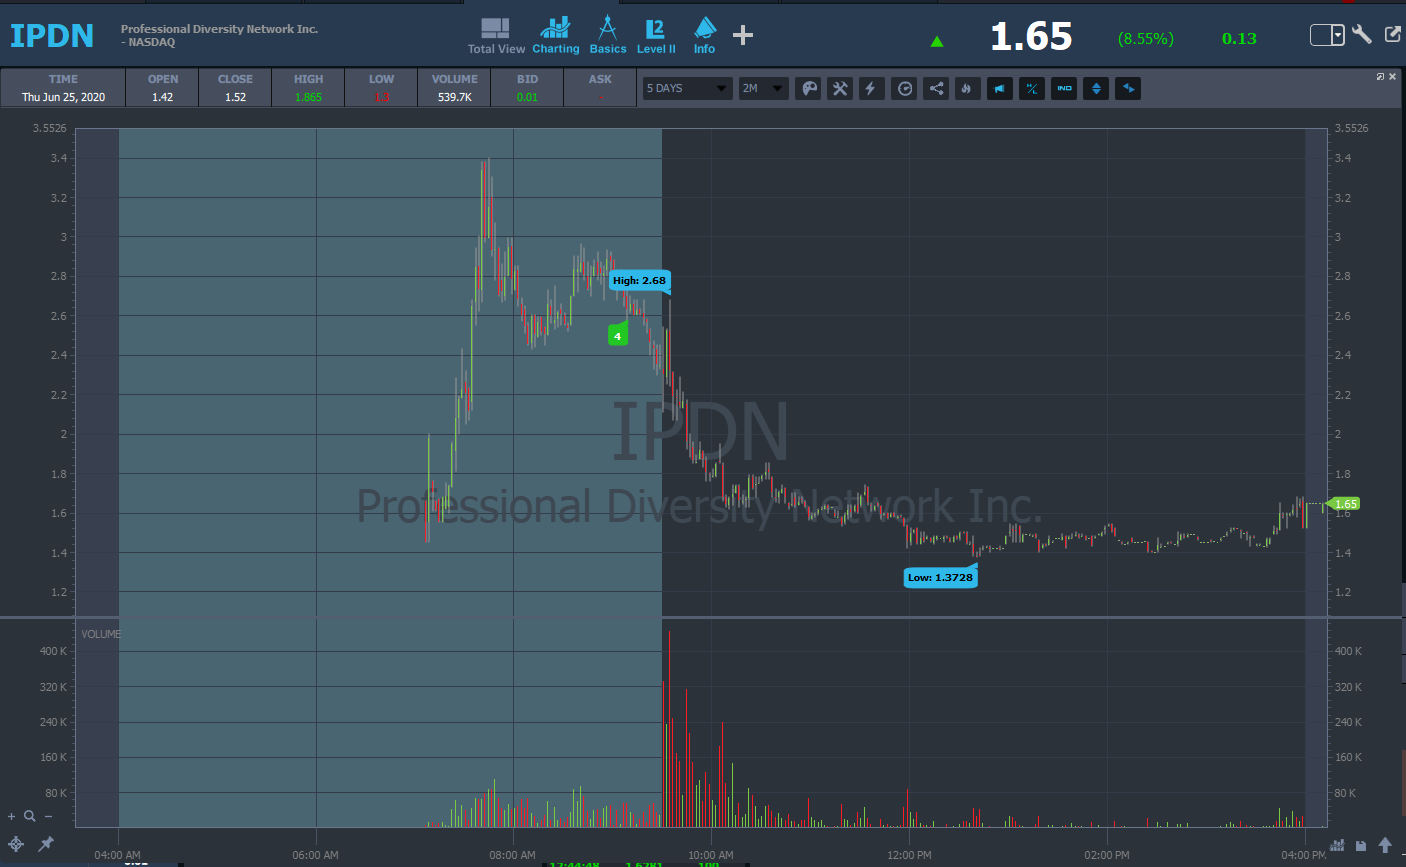

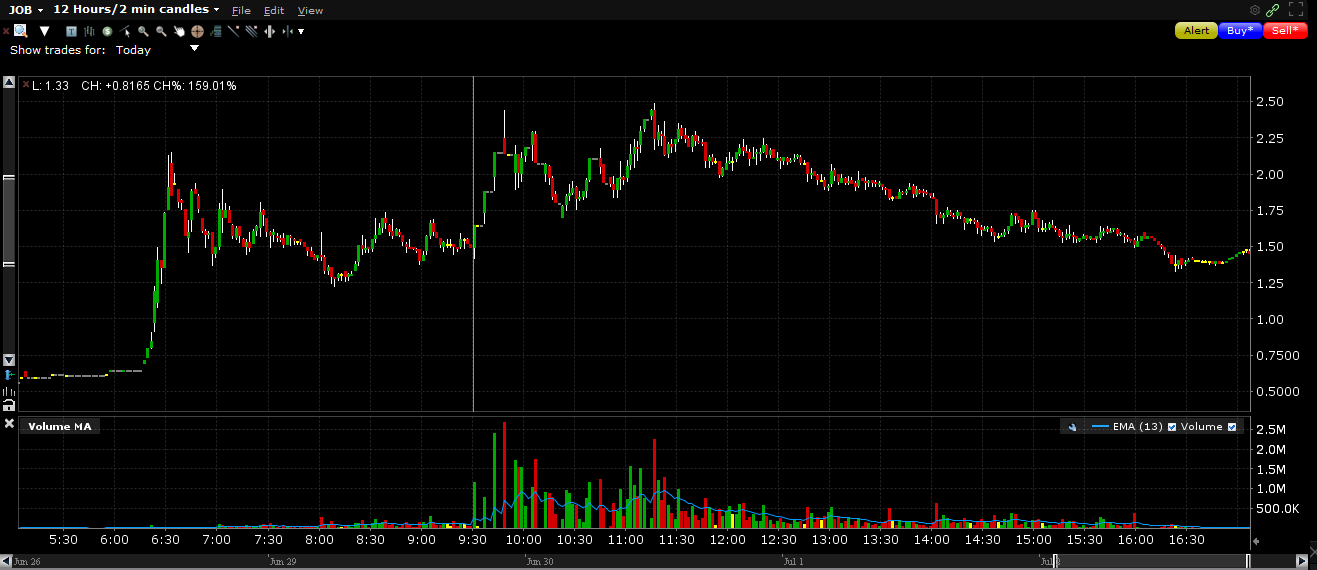

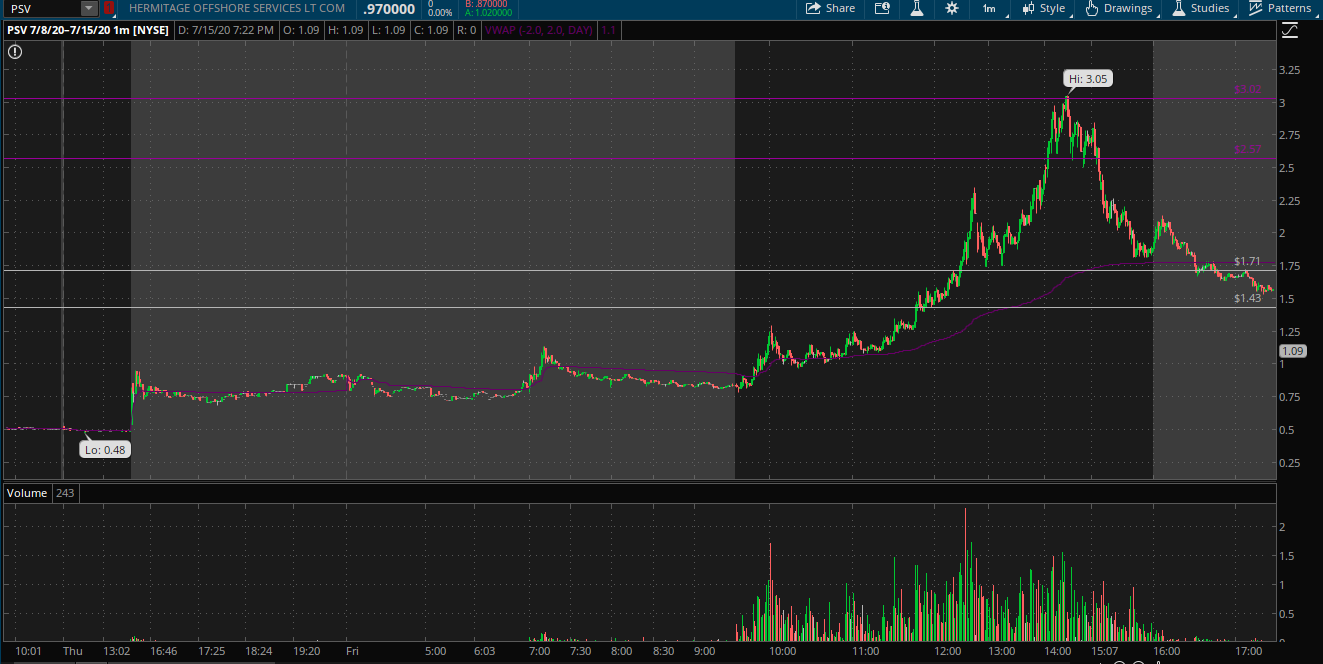

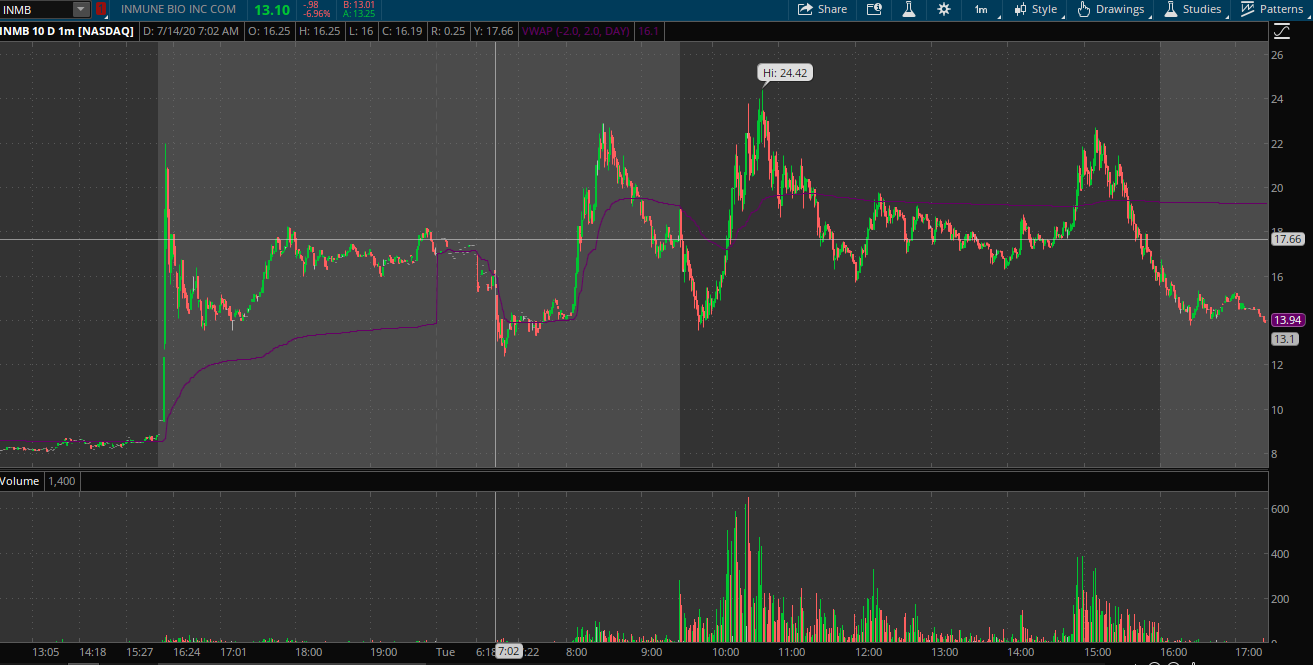

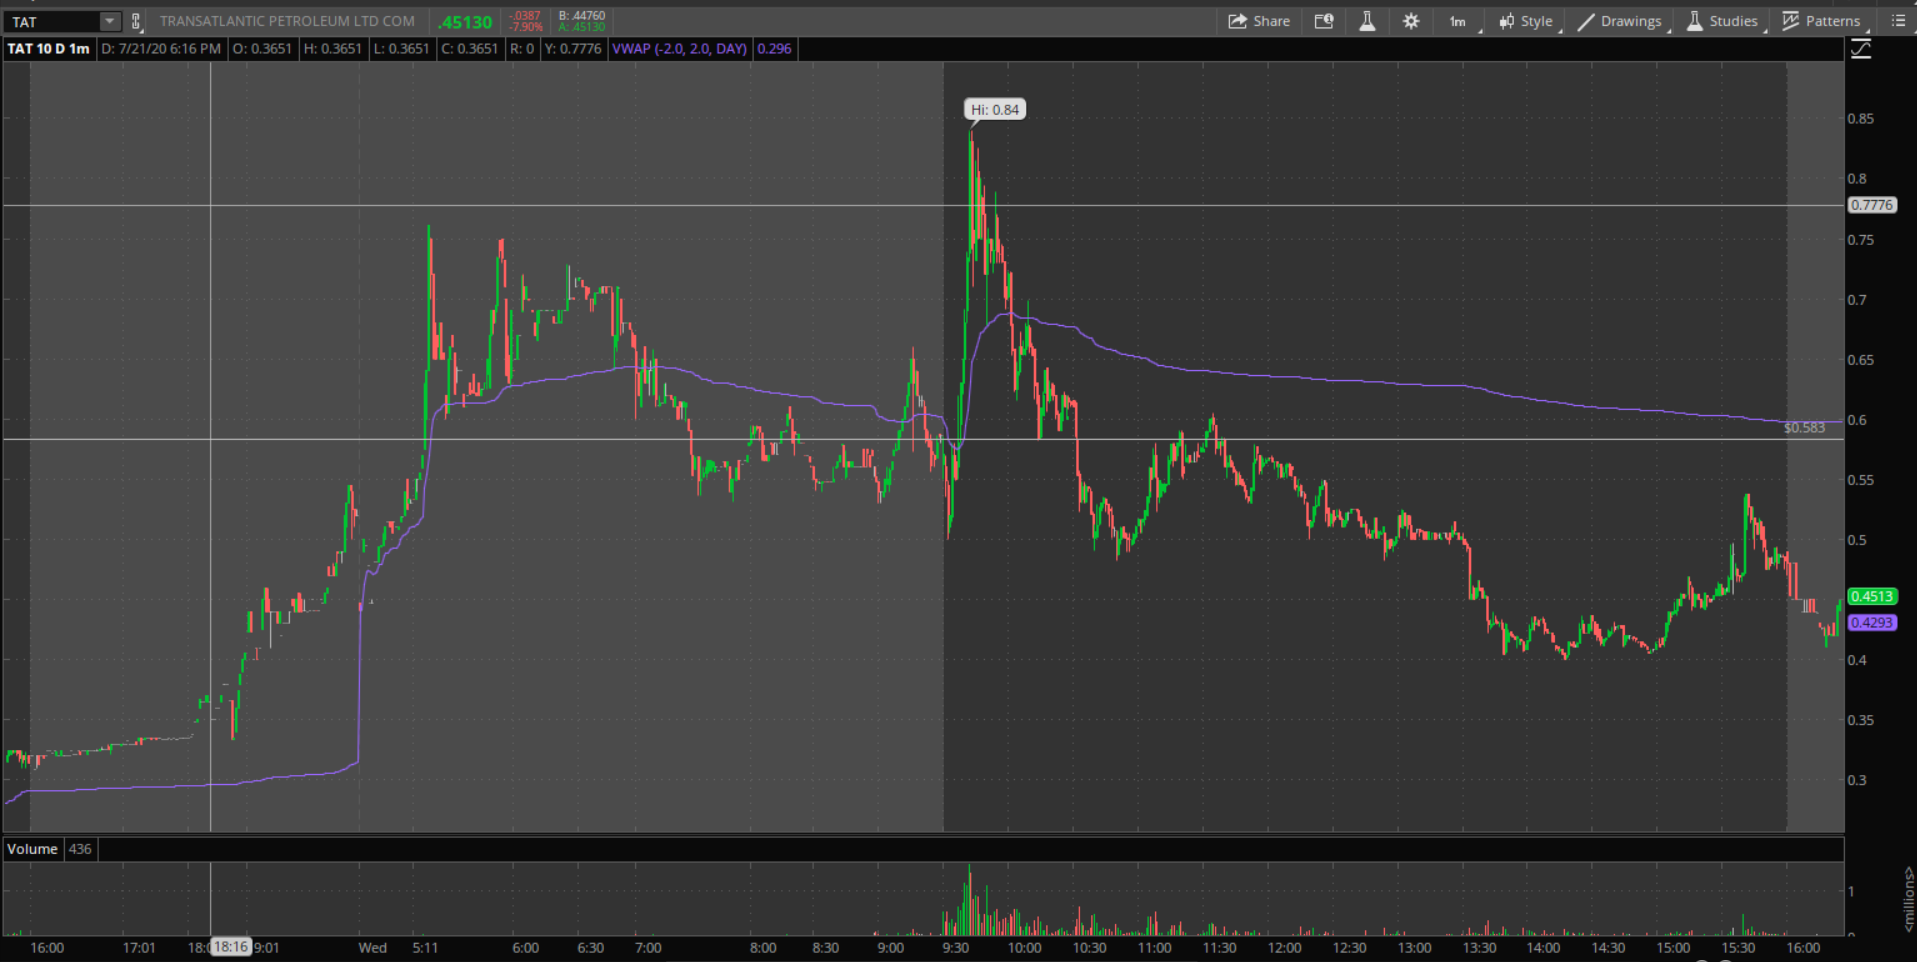

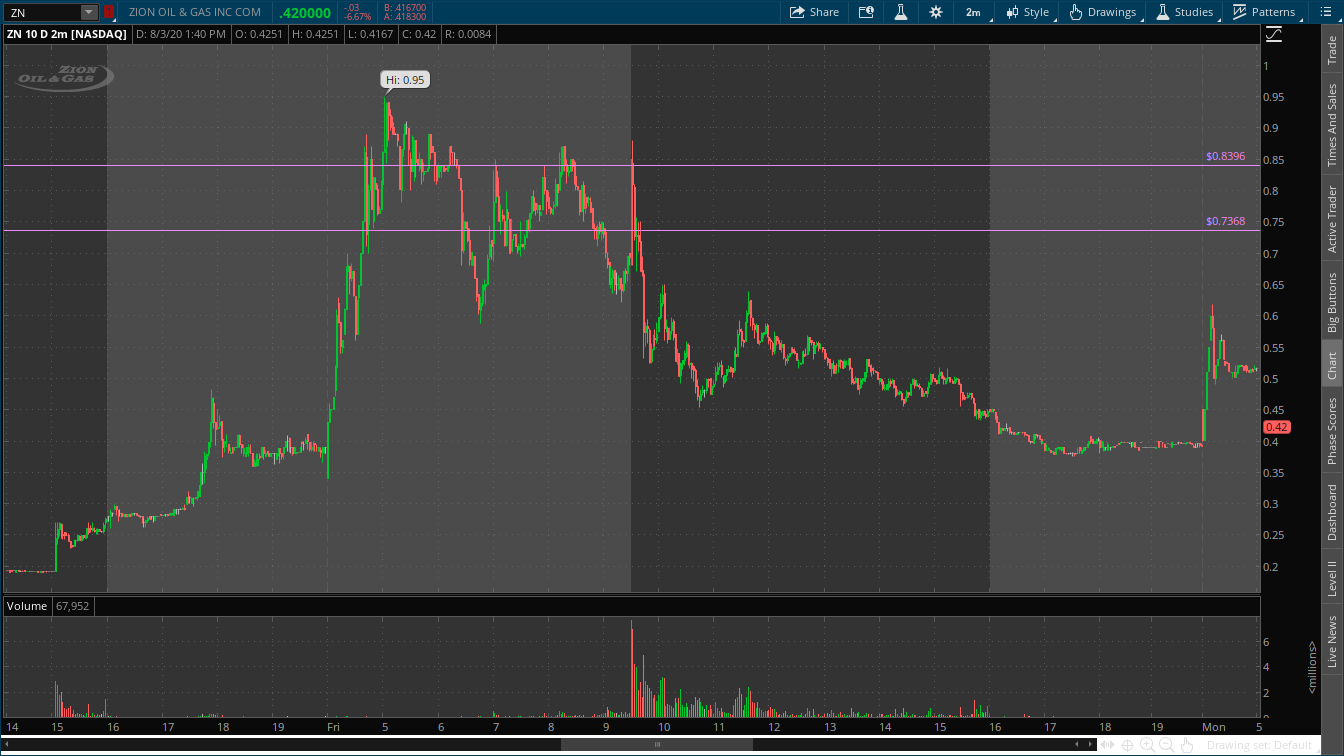

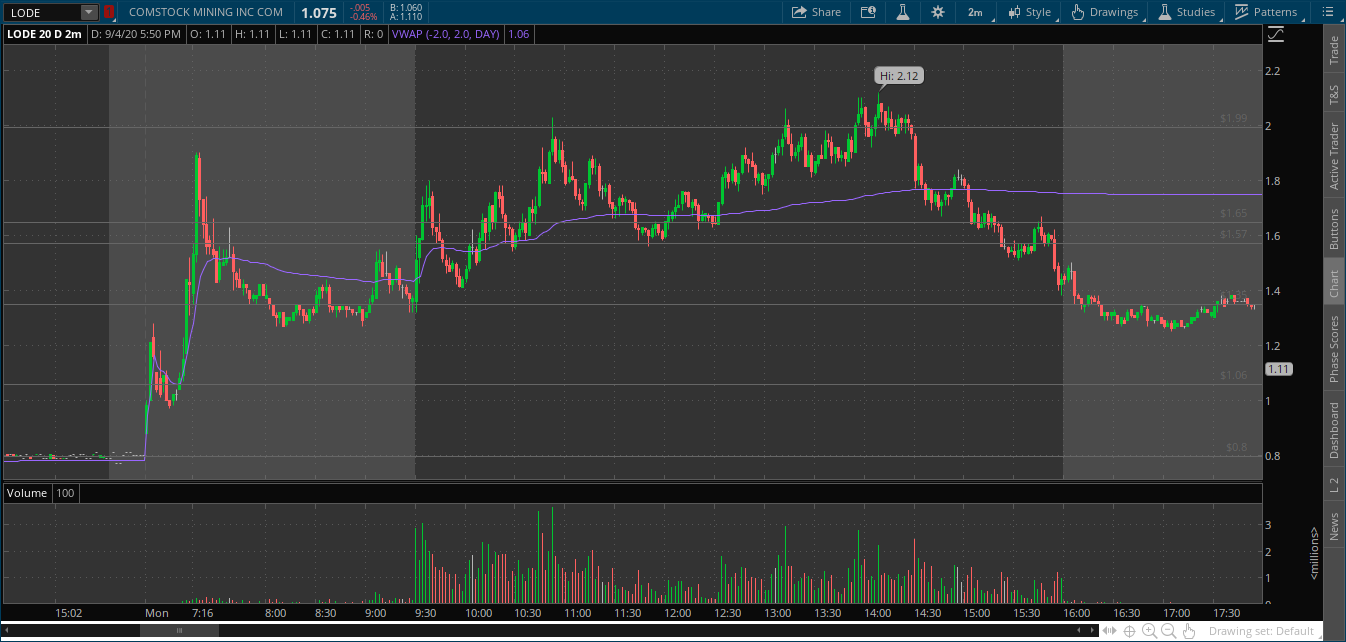

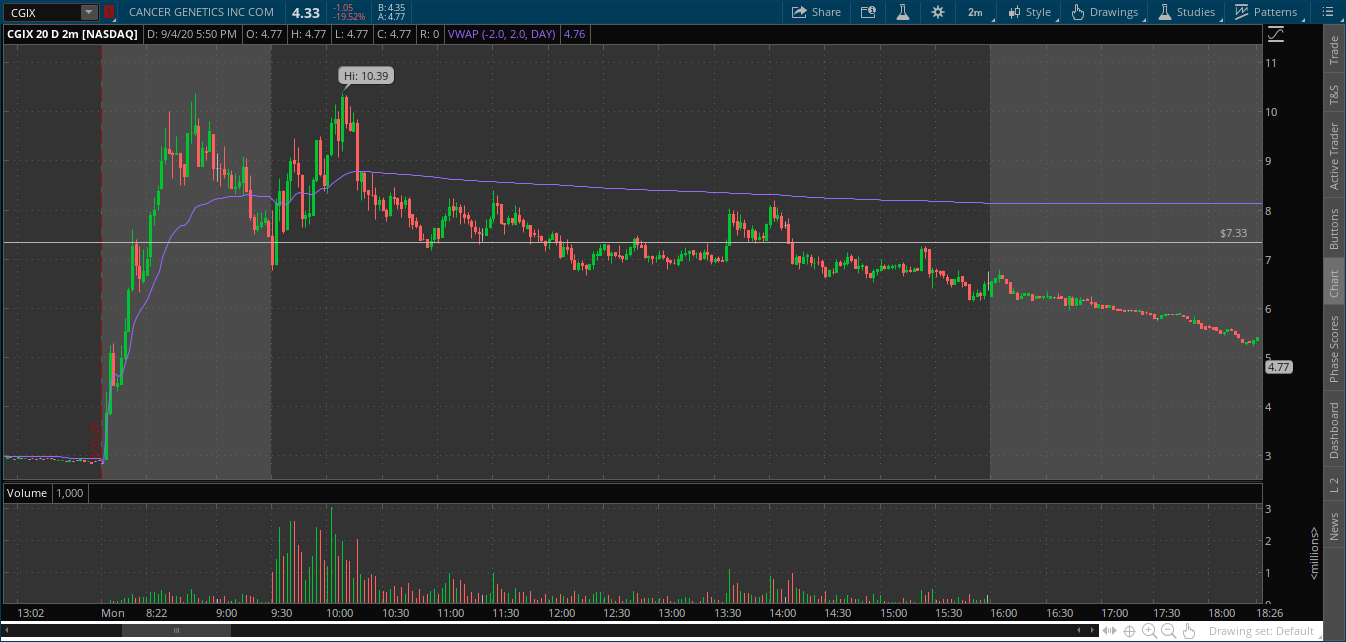

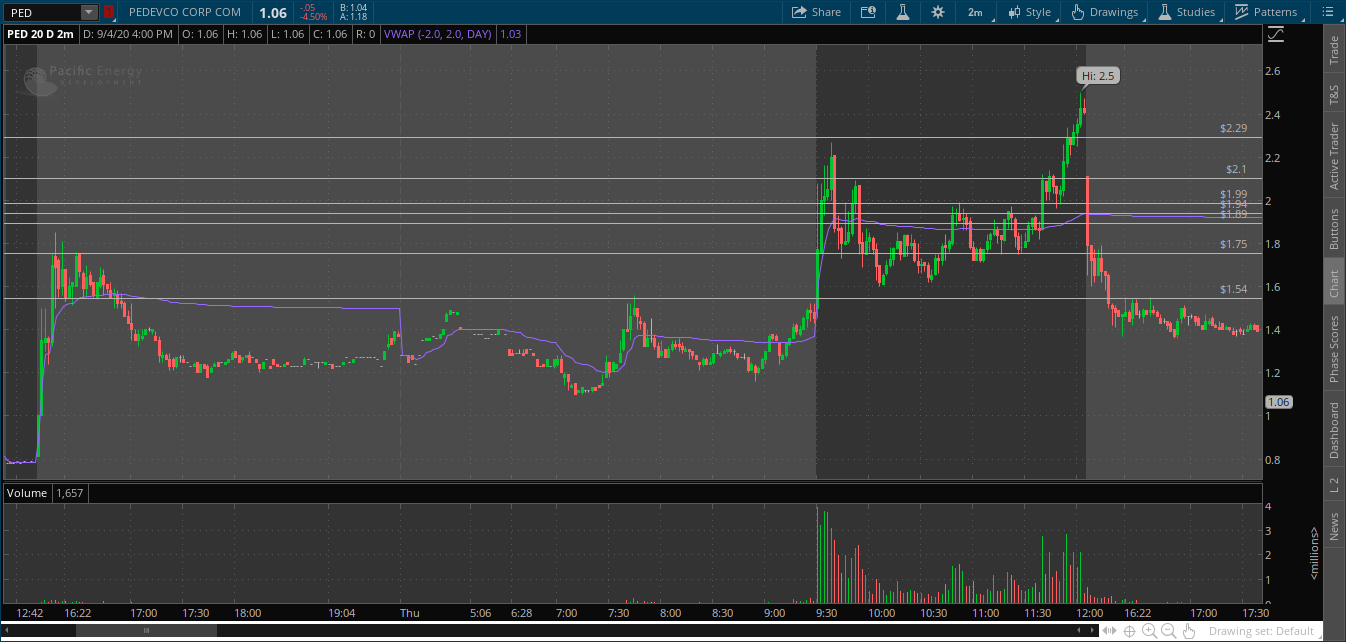

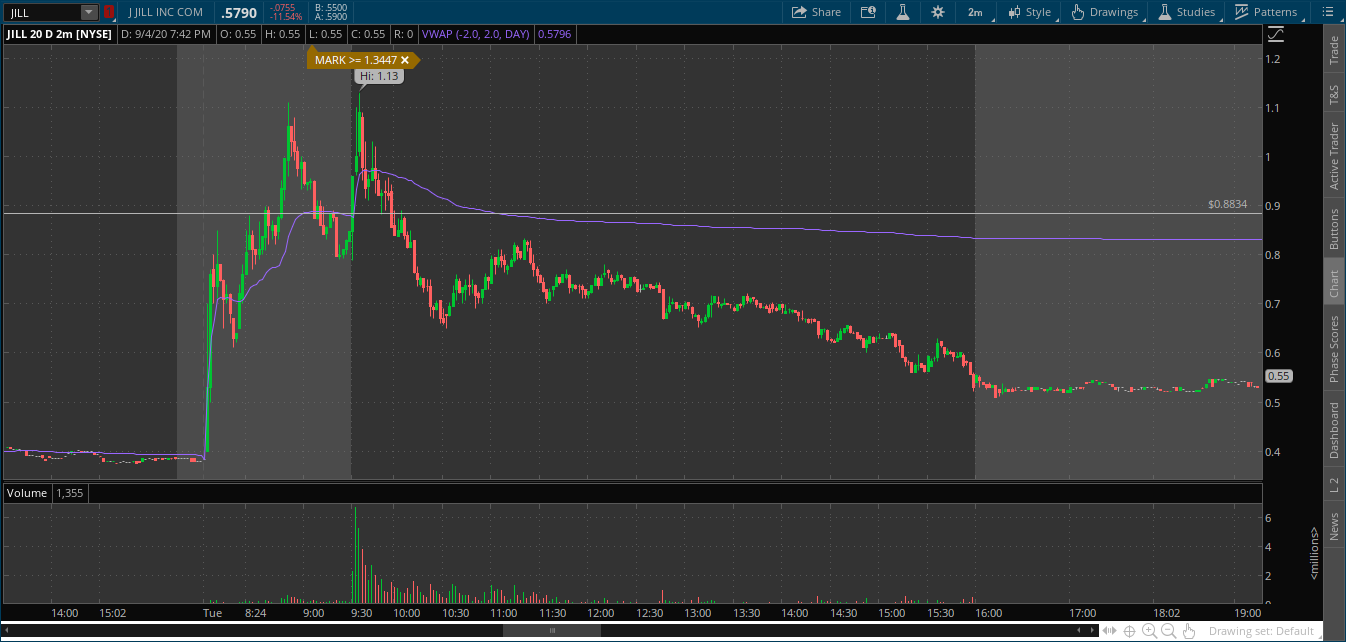

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

FileNotFoundError: No such file or directory: 'C:\\Users\\migue\\Trading\\My Statistics\\done'

<IPython.core.display.Image object>

In [57]:
from IPython.display import Image
from IPython.display import display
path = r"C:\\Users\\migue\\Trading\\My Statistics\\"
#Nice to see: A year time line where where the wins happened (separated by months)
#Data used for strategies: 170 samples
#Test_Data: 67 samples
#####################Copy From Results Interpreter####################

# W: 69.0  O: 13.0  W*O: 897.0
m_push_min =  5.0

filt =  (data['PM Spike Drop (%)'] >= 30 ) & (data['PM Spike Drop (%)'] <= 50 ) & \
(data['Open Price'] >= 0 ) & (data['Open Price'] <= 200 ) & \
(data['Float (M)'] >= 0 ) & (data['Float (M)'] <= 500 ) & \
(data['PM Volume (M)'] >= 0 ) & (data['PM Volume (M)'] <= 100 ) & (data['PM Volume (M)'] >= 1 ) & (data['PM Volume (M)'] <= 100 ) & \
(data['PM Float Rotations'] >= 0 ) & (data['PM Float Rotations'] <= 10 ) & (data['PM Float Rotations'] >= 0 ) & (data['PM Float Rotations'] <= 100 ) & \
(data['MC (M)'] >= 0 ) & (data['MC (M)'] <= 500 ) & (data['MC (M)'] >= 0 ) & (data['MC (M)'] <= 1500 ) & \
(data['PM Change %'] >= 65 ) & (data['PM Change %'] <= 1000 ) & \
((data['News'] == 0) | (data['News'] == 1) | (data['News'] == 2))


######################################################################

m_min_filt = (data['H(M) %'] >= m_push_min)
m_max_filt = (data['H(M) %'] <= m_push_min+10)
losers_filt = (data['H(M) %'] >= m_push_min+10)

tradable_d = data[filt & m_min_filt]
wins_d = tradable_d.loc[m_max_filt]
losers_d = tradable_d.loc[losers_filt]

occasions = len(tradable_d)
wins = len(wins_d)
lost = len(losers_d)

w_percent = wins/occasions*100
print(w_percent,"% ","in",occasions,"occasions")

if(not wins+lost==occasions):
    print("Conflictiong Data: ",wins,"+",lost,"!=",occasions)
print("Wins: ")

for row in wins_d['Chart']:
    decoded = row.encode('unicode-escape').decode()
    replaced = decoded.replace("x8","20")
    display(Image(path+replaced)) 
    
print("Losses:")
for row in losers_d['Chart']:
    decoded = row.encode('unicode-escape').decode()
    replaced = decoded.replace("x8","20")
    display(Image(path+replaced)) 
    
#wins_d
# Take into account... This doesnt account for a Higher point later in the day which can turn it into a potential looser! or R/R

In [58]:
data.describe()

MC (M)   Float (M)  PM Volume (M)  Relative Vol  Av Vol (90) (k)  \
count   237.000000  237.000000     237.000000    211.000000       228.000000   
mean    106.982152   24.079497       9.380312     53.955393      2079.631828   
std     169.538090   41.418317      12.859760    215.039351      4937.414748   
min       6.900000    0.600595       0.002900      0.047640         0.000000   
25%      25.456000    4.000000       2.760000      0.897940       138.250000   
50%      50.204000   10.000000       6.000000      4.299108       492.000000   
75%     105.269865   21.020150      12.086366     24.144216      1631.884183   
max    1477.000000  279.000000     143.155900   2570.226246     41000.000000   

       PM Change %  Change % (Prev.Day)        News  Resistance Volume (M)  \
count   237.000000           236.000000  237.000000             235.000000   
mean    125.039324            14.130826    0.953586              22.008000   
std      75.949851            44.615361    0.598336              49.813921   
min      50.000000           -23.000000    0.000000               0.000000   
25%      76.811594            -1.010294    1.000000               0.000000   
50%     104.000000             1.086915    1.000000               2.000000   
75%     145.890411            11.000000    1.000000              19.500000   
max     578.688525           423.700000    2.000000             400.000000   

        Res Price  ...  High Price (D)     Low (D)  close price      Drop %  \
count  170.000000  ...      237.000000  237.000000   237.000000  227.000000   
mean     5.164798  ...        6.563924    3.342068     4.084852   34.619075   
std      5.706093  ...        7.748914    3.361749     4.871054   10.784947   
min      0.390000  ...        0.250000    0.130000     0.150000   12.000000   
25%      1.608650  ...        2.250000    1.230000     1.380000   27.000000   
50%      3.292887  ...        3.800000    2.210000     2.550000   34.000000   
75%      5.920050  ...        7.890000    4.150000     4.960000   41.800000   
max     36.032700  ...       60.000000   18.060000    33.200000   65.000000   

       PM Spike Drop (%)  Closed Red?         H(M) %       H(D) %      L(D) %  \
count         237.000000   237.000000     237.000000   237.000000  236.000000   
mean           31.148077     0.797468     515.310341    36.195133  -43.875352   
std            19.051083     0.402737    7585.534977    87.606143   12.754005   
min            -4.605973     0.000000      -5.364291     0.000000  -92.918455   
25%            15.461263     1.000000       6.493506     7.441860  -51.364764   
50%            30.548780     1.000000      12.621359    15.697674  -43.127778   
75%            44.117647     1.000000      27.959698    38.828880  -34.660131   
max            81.387659     1.000000  116799.671100  1216.384181  -17.959184   

       PM Float Rotations  
count          237.000000  
mean             1.054573  
std              1.383654  
min              0.000161  
25%              0.205882  
50%              0.584795  
75%              1.200000  
max             10.000000  

[8 rows x 26 columns]

In [59]:
losers_d

Date Ticker      MC (M)   Float (M)  PM Volume (M)  Relative Vol  \
7    23/04/2020    OAS  341.748000  279.000000      15.211000      8.560000   
10   27/04/2020   NAKD    6.900000    3.950000       4.443000     13.000000   
17    6/05/2020   CPSH   25.456000    8.000000       1.710000      6.420000   
47    4/06/2020   TMDI   38.157000   59.800000       9.000000      0.650000   
60   10/06/2020   CRIS   77.880000   30.000000       7.500000     28.000000   
67   12/06/2020   EMAN   66.096000   42.000000       7.800000      2.300000   
71   15/06/2020   EDSA   64.500000    3.900000       2.650000      0.530000   
74   16/06/2020   CLIR  112.752000   15.000000       2.000000           NaN   
80   17/06/2020   LMFA   10.000000    2.110000       1.600000      0.650000   
95   24/06/2020   IPDN   40.000000    4.000000       2.800000    300.000000   
106   2/07/2020    JOB   23.000000   11.990000       6.000000      0.230000   
113  10/07/2020    PSV   25.000000    8.300000       3.900000     10.000000   
119  14/07/2020   INMB  195.000000    3.860000       2.400000     18.000000   
126  22/07/2020    TAT   39.000000   27.170000       3.000000      3.760000   
140  31/07/2020     ZN  113.000000  162.000000      20.000000     21.000000   
156  17/08/2020   LODE   42.648750   20.008452       8.204002           NaN   
162  24/08/2020   CGIX   18.022433    2.214281       8.921131      0.966822   
163  27/08/2020    PED   96.800000    8.400000       3.600000           NaN   
165   1/09/2020   JILL   36.700000   17.396189       8.890220     57.324271   
196   9/10/2020   SDPI   18.790000   10.606080       1.356974     29.797968   
211  21/10/2020   ASTC   35.690655    5.354234      16.658461    128.614784   
213  21/10/2020    TGC   40.156800   10.469956       5.933026      0.233634   
234  16/11/2020   ATHE   59.000000   13.700000       5.000000           NaN   

     Av Vol (90) (k)  PM Change %  Change % (Prev.Day)  News  ...  \
7       21400.000000    72.600000             0.000000     1  ...   
10        811.000000   130.000000             4.000000     0  ...   
17        100.000000    72.000000            -0.580000     1  ...   
47       1790.000000   130.000000            -0.340000     1  ...   
60        213.000000    77.000000            41.000000     1  ...   
67       2210.000000    94.400000           -16.000000     1  ...   
71         60.000000   158.000000             1.000000     1  ...   
74        600.000000    94.400000             0.000000     1  ...   
80         76.000000   145.000000            13.830000     0  ...   
95         80.000000   158.000000             0.000000     1  ...   
106       351.000000   187.000000            -6.000000     0  ...   
113       200.000000    68.000000            -3.000000     2  ...   
119        81.000000    96.000000            26.000000     1  ...   
126      1000.000000    88.000000            22.900000     0  ...   
140      5450.000000   155.000000            34.000000     1  ...   
156              NaN    73.400000             1.220000     2  ...   
162        58.052656   169.319632            -3.976821     2  ...   
163      1000.000000    84.000000             0.000000     1  ...   
165      1801.236122   120.130039            -2.400000     1  ...   
196       192.041978    77.055542            10.000000     0  ...   
211       646.609333   169.230769             1.197605     1  ...   
213        48.246322   287.429160            -0.594080     2  ...   
234              NaN   150.000000             2.000000     1  ...   

     Best Entry T  Best Exit T  Drop %  PM Spike Drop (%)  Closed Red?  \
7             NaN          NaN     NaN          40.947604            0   
10           9:36        10:03   35.00          43.717001            1   
17           9:48        14:00   24.31          38.651685            1   
47          10:26        13:52   31.00          41.262458            0   
60           9:31         9:34   21.00          39.034707            1   
67          1

In [60]:
#Method checking if the index being passed is valid... a Class with this methods could be developed
def valid_index(array, i, r):
    if i < len(array)-r:
        return True
    else:
        return False
#Method to get filter of the reséctive range
def get_filter(array, header, i, j, r):
    filter = (data[header] >= array[i]) & (data[header] <= array[j+r])  
    return filter

Runtime of the program is 71.18438220024109


In [62]:
data.head()

Date Ticker     MC (M)  Float (M)  PM Volume (M)  Relative Vol  \
0  20/04/2020   BRQS  278.86704      24.00          0.130           NaN   
1  20/04/2020    NBY   88.03242      16.00         11.507           NaN   
2  21/04/2020   WATT   99.56000      28.00         10.100           NaN   
3  22/04/2020   ATIF  159.90000       6.60          0.410           NaN   
4  22/04/2020   PECK   55.61400       1.94          0.458           NaN   

   Av Vol (90) (k)  PM Change %  Change % (Prev.Day)  News  ...  Best Entry T  \
0             88.0        96.94                 20.0     1  ...          9:30   
1           2659.0       132.89                 76.0     1  ...          9:30   
2           2307.0       162.00                243.0     1  ...          9:38   
3            156.0       105.00                 21.0     1  ...          9:31   
4            201.0        79.40                 74.0     2  ...          9:50   

  Best Exit T  Drop %  PM Spike Drop (%)  Closed Red?     H(M) %     H(D) %  \
0       10:23    34.0          12.289011            1   0.000000   0.000000   
1       10:34    26.0           0.000000            1   0.000000   0.000000   
2       10:10    23.0           8.106436            1  36.363636  45.454545   
3       10:40    33.0          21.331946            1   2.222222   2.222222   
4       10:28    38.0           1.734574            1  44.531250  44.531250   

      L(D) %  PM Float Rotations                                  Chart  
0 -48.275862            0.005417  Gap Up Short (+70%)\20200420 BRQS.PNG  
1 -27.647059            0.719187   Gap Up Short (+70%)\20200420 NBY.PNG  
2 -38.750000            0.360714  Gap Up Short (+70%)\20200421 WATT.PNG  
3 -45.108696            0.062121  Gap Up Short (+70%)\20200422 ATIF.PNG  
4 -43.675676            0.236082  Gap Up Short (+70%)\20200422 PECK.PNG  

[5 rows x 32 columns]

In [63]:
#Recursive approach!
variables_arr = np.array([hm_percentages_range, pm_spike_drop_range, open_price_range, float_range, pm_vol_range, \
                          float_rotation_range, market_cap_range, pm_change_range, news_range, resisitance_vol_range, \
                          resistance_distance_range], dtype=object)

def get_stats(arr, iter=None):
    if iter is None:
        iter = 0

A machine learning approach which calculates the best winning % for all pushing %ges would be interesting!

In [64]:
p3d = plt.figure().gca(projection='3d')
p3d.scatter(data['Float (M)'], data['MC (M)'], data['H(M) %'], s=3)
p3d.set_xlabel('Float')
p3d.set_ylabel('MC')
p3d.set_zlabel('H(M) %')
p3d.set_xlim3d(0, 100)
p3d.set_ylim3d(0,500)
p3d.set_zlim3d(0,100)
plt.show() 

#Do this excluding factors like price, loss% etc

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [65]:
#Do PM Vol, Float, High(M) %
# Does That tell about float rotations?!
p3d = plt.figure().gca(projection='3d')
p3d.scatter(data['Float (M)'], data['PM Volume (M)'], data['H(M) %'], s=3)
p3d.set_xlabel('Float (M)')
p3d.set_ylabel('PM Volume (M)')
p3d.set_zlabel('H(M) %')
'''
p3d.set_xlim3d(0, 100)
p3d.set_ylim3d(0,500)
p3d.set_zlim3d(0,100)
'''
plt.show() 
#THis is a quite good chart actually!

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [66]:
# Fields to evaluate (if they have an influence)
#Rel. Vol.
#AV Vol (90)
#Change (previous day)
#News
#Resistance Type

## Distribution of Morning Push (%), Day High (%) and Push/drop  + Green & Red Ranges

In [67]:
combined_df

NameError: name 'combined_df' is not defined